# **FLIGHT PRICE PREDICTION**

The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

# **DATA UNDERSTANDING**


In [6]:
import pandas as pd
import numpy as np


pd.options.mode.chained_assignment = None  # default='warn'

import warnings
warnings.filterwarnings('ignore')

In [7]:
pathData = 'https://raw.githubusercontent.com/mrazakqq/data-science-learning/main/dataset/flight-price-prediction/Clean_Dataset.csv'
data = pd.read_csv(pathData)

In [8]:
dtype = data.dtypes
missingValue = data.isnull().sum()
memoryUsage = data.memory_usage(deep=True)
columns={
    0:'missing_value',
    1:'memory_usage_bytes',
    2:'dtype'}

print(f'Dataset dimensions\t: {data.shape}')
print(f'Rows duplicated\t\t: {data.duplicated().sum()}')

infoData = pd.concat([missingValue, memoryUsage, dtype], axis=1)
# infoData.rename(columns=columns)
infoData.drop(index='Index').rename(columns=columns)
# memoryUsage

Dataset dimensions	: (300153, 12)
Rows duplicated		: 0


missing_value  memory_usage_bytes    dtype
Unnamed: 0                  0.0             2401224    int64
airline                     0.0            19360640   object
flight                      0.0            18953387   object
source_city                 0.0            19211944   object
departure_time              0.0            19614008   object
stops                       0.0            18151472   object
arrival_time                0.0            19237499   object
destination_city            0.0            19223563   object
class                       0.0            19303279   object
duration                    0.0             2401224  float64
days_left                   0.0             2401224    int64
price                       0.0             2401224    int64

In [9]:
data.head()

Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  
0          Night           Mumbai  Economy      2.17          1   5953  
1        Morning           Mumbai  Economy      2.33          1   5953  
2  Early_Morning           Mumbai  Economy      2.17          1   5956  
3      Afternoon           Mumbai  Economy      2.25          1   5955  
4        Morning           Mumbai  Economy      2.33          1   5955

## **Numerical Features**
  - 'Unnamed: 0' tidak berpengaruh terhadap harga tiket.

In [10]:
data.describe()

Unnamed: 0       duration      days_left          price
count  300153.000000  300153.000000  300153.000000  300153.000000
mean   150076.000000      12.221021      26.004751   20889.660523
std     86646.852011       7.191997      13.561004   22697.767366
min         0.000000       0.830000       1.000000    1105.000000
25%     75038.000000       6.830000      15.000000    4783.000000
50%    150076.000000      11.250000      26.000000    7425.000000
75%    225114.000000      16.170000      38.000000   42521.000000
max    300152.000000      49.830000      49.000000  123071.000000

## **Categorical Features**

In [11]:
data.describe(include='object')

airline  flight source_city departure_time   stops arrival_time  \
count    300153  300153      300153         300153  300153       300153   
unique        6    1561           6              6       3            6   
top     Vistara  UK-706       Delhi        Morning     one        Night   
freq     127859    3235       61343          71146  250863        91538   

       destination_city    class  
count            300153   300153  
unique                6        2  
top              Mumbai  Economy  
freq              59097   206666

### **airline**

In [12]:
airline = (pd.DataFrame([data.airline.value_counts(), 
              (round(data.airline.value_counts()*100/len(data.airline), 1))], 
              index=['count', 'percentage']).T.reset_index()).rename(columns={'index':'airline'})
airline

airline     count  percentage
0    Vistara  127859.0        42.6
1  Air_India   80892.0        27.0
2     Indigo   43120.0        14.4
3   GO_FIRST   23173.0         7.7
4    AirAsia   16098.0         5.4
5   SpiceJet    9011.0         3.0

### **flight**

In [13]:
flight = (pd.DataFrame([data.flight.value_counts(), 
              (round(data.flight.value_counts()*100/len(data.flight), 1))], 
              index=['count', 'percentage']).T.reset_index()).rename(columns={'index':'flight'})
flight

flight   count  percentage
0      UK-706  3235.0         1.1
1      UK-772  2741.0         0.9
2      UK-720  2650.0         0.9
3      UK-836  2542.0         0.8
4      UK-822  2468.0         0.8
...       ...     ...         ...
1556  SG-9923     1.0         0.0
1557  6E-6474     1.0         0.0
1558   6E-865     1.0         0.0
1559   G8-705     1.0         0.0
1560   G8-107     1.0         0.0

[1561 rows x 3 columns]

### **source_city**

In [14]:
sourceCity = (pd.DataFrame([data.source_city.value_counts(),(round(data.source_city.value_counts()*100/len(data.source_city), 1))], 
                index=['count', 'percentage']).T.reset_index()).rename(columns={'index':'source_city'})
sourceCity

source_city    count  percentage
0       Delhi  61343.0        20.4
1      Mumbai  60896.0        20.3
2   Bangalore  52061.0        17.3
3     Kolkata  46347.0        15.4
4   Hyderabad  40806.0        13.6
5     Chennai  38700.0        12.9

### **destination_city**

In [15]:
destinationCity = (pd.DataFrame([data.destination_city.value_counts(), (round(data.destination_city.value_counts()*100/len(data.destination_city), 1))], 
                    index=['count', 'percentage']).T.reset_index()).rename(columns={'index':'destination_city'})
destinationCity

destination_city    count  percentage
0           Mumbai  59097.0        19.7
1            Delhi  57360.0        19.1
2        Bangalore  51068.0        17.0
3          Kolkata  49534.0        16.5
4        Hyderabad  42726.0        14.2
5          Chennai  40368.0        13.4

### **departure_time**

---



In [16]:
departureTime = (pd.DataFrame([data.departure_time.value_counts(), 
              (round(data.departure_time.value_counts()*100/len(data.departure_time), 1))], 
              index=['count', 'percentage']).T.reset_index()).rename(columns={'index':'departure_time'})
departureTime

departure_time    count  percentage
0        Morning  71146.0        23.7
1  Early_Morning  66790.0        22.3
2        Evening  65102.0        21.7
3          Night  48015.0        16.0
4      Afternoon  47794.0        15.9
5     Late_Night   1306.0         0.4

### **arrival_time**

In [17]:
arrivalTime = (pd.DataFrame([data.arrival_time.value_counts(), 
              (round(data.arrival_time.value_counts()*100/len(data.arrival_time), 1))], 
              index=['count', 'percentage']).T.reset_index()).rename(columns={'index':'arrival_time'})
arrivalTime

arrival_time    count  percentage
0          Night  91538.0        30.5
1        Evening  78323.0        26.1
2        Morning  62735.0        20.9
3      Afternoon  38139.0        12.7
4  Early_Morning  15417.0         5.1
5     Late_Night  14001.0         4.7

### **stops**

In [18]:
stops = (pd.DataFrame([data.stops.value_counts(), 
              (round(data.stops.value_counts()*100/len(data.stops), 1))], 
              index=['count', 'percentage']).T.reset_index()).rename(columns={'index':'stops'})
stops

stops     count  percentage
0          one  250863.0        83.6
1         zero   36004.0        12.0
2  two_or_more   13286.0         4.4

### **class**

In [19]:
class_ = (pd.DataFrame([data['class'].value_counts(), 
              (round(data['class'].value_counts()*100/len(data['class']), 1))], 
              index=['count', 'percentage']).T.reset_index()).rename(columns={'index':'class'})
class_

class     count  percentage
0   Economy  206666.0        68.9
1  Business   93487.0        31.1

# **EXPLORATORY DATA ANALYSIS**


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(rc={
          'figure.figsize': (18, 8)
        })
sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":18})

## **Correlation**
Korelasi dicari menggunakan library dython berbasis feature selection ANOVA untuk menghitung korelasi antara Categorical-Numerical Features karena sebagaian besar features merupakan categorical features.
  - 'Unnamed: 0' dan 'flight' (unique) didrop karna high correlaty.

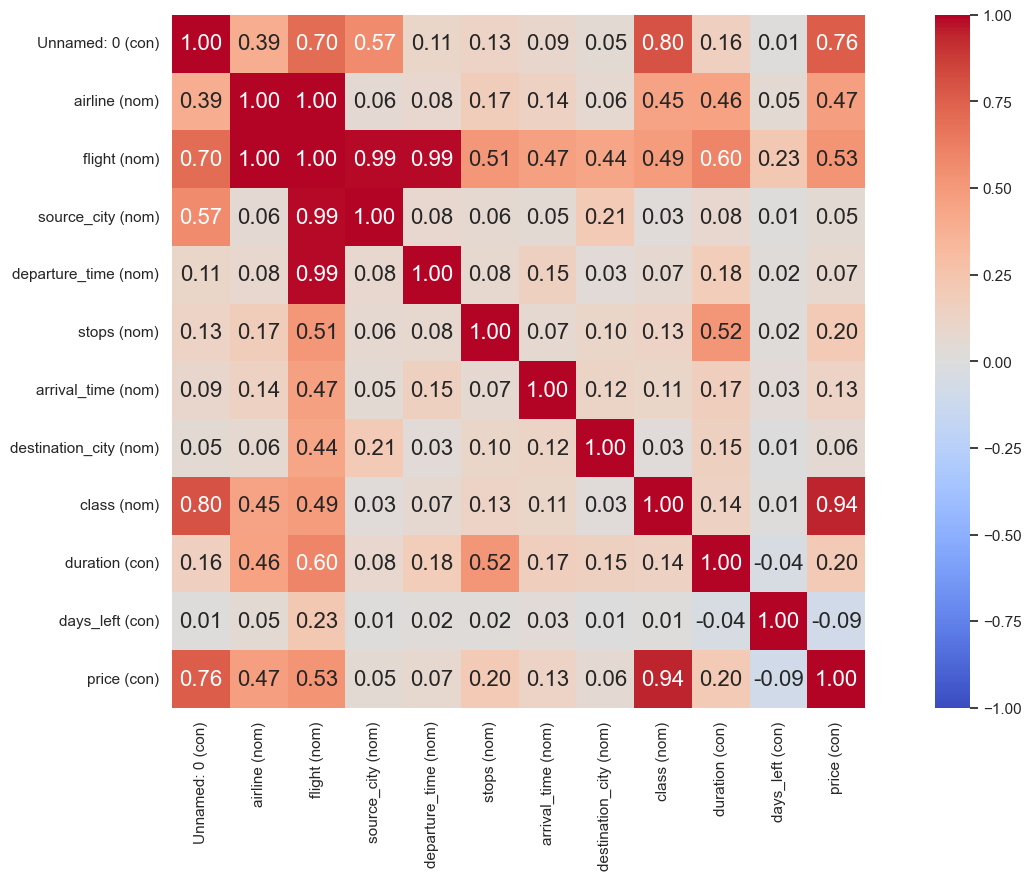

In [83]:
# !pip install dython
from dython import nominal
nominal.associations(data, figsize=(18,9), mark_columns=True, cmap='coolwarm');

## **Numerical Features**

### **days_left and price**

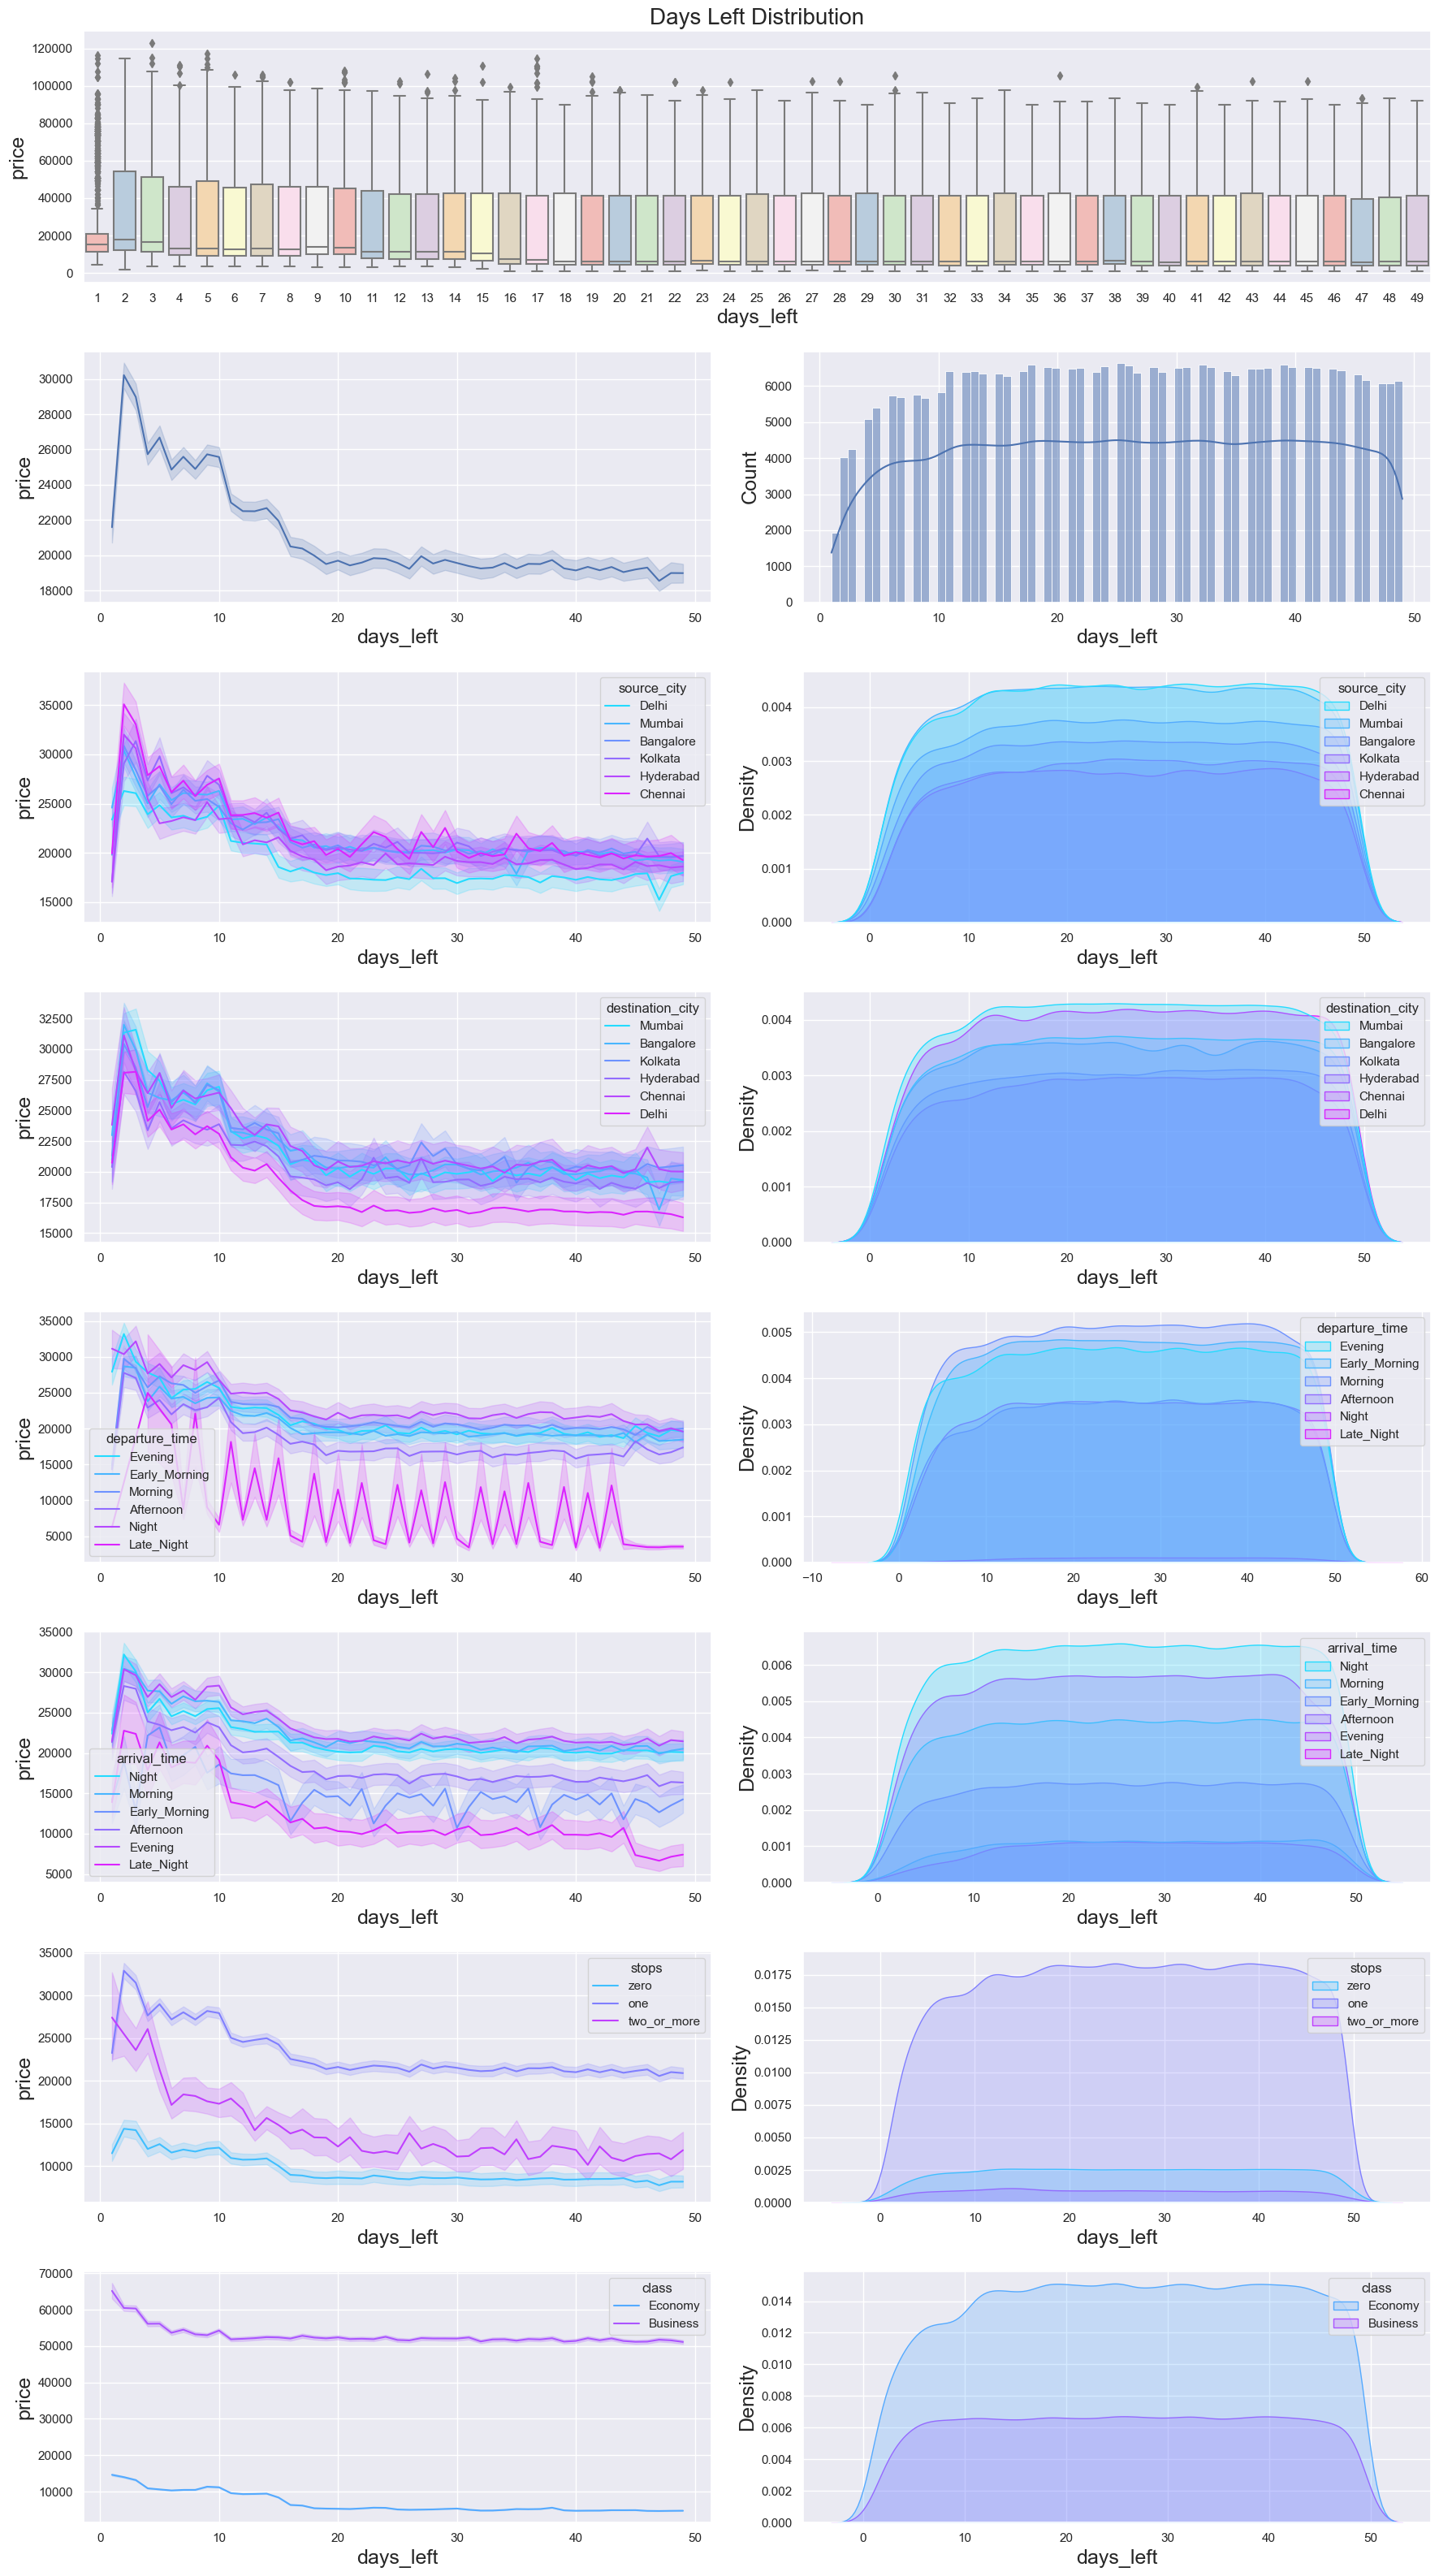

In [84]:
f, ax = plt.subplots(8, 2, figsize=(18,32))
plt.subplot2grid((8,2), (0,0), colspan=2)
plt.title('Days Left Distribution')
sns.boxplot(x='days_left', y='price', data=data, palette='Pastel1')
plt.subplot2grid((8,2), (1,0))
sns.lineplot(x='days_left', y='price', data=data, palette='cool', estimator=np.mean)
plt.subplot2grid((8,2), (1,1))
sns.histplot(x='days_left', data=data, kde=True)
plt.subplot2grid((8,2), (2,0))
sns.lineplot(x='days_left', y='price', data=data, palette='cool', estimator=np.mean, hue='source_city')
plt.subplot2grid((8,2), (2,1))
sns.kdeplot(x='days_left', data=data, palette='cool', shade=True, hue='source_city')
plt.subplot2grid((8,2), (3,0))
sns.lineplot(x='days_left', y='price', data=data, palette='cool', estimator=np.mean, hue='destination_city')
plt.subplot2grid((8,2), (3,1))
sns.kdeplot(x='days_left', data=data, palette='cool', shade=True, hue='destination_city')
plt.subplot2grid((8,2), (4,0))
sns.lineplot(x='days_left', y='price', data=data, palette='cool', estimator=np.mean, hue='departure_time')
plt.subplot2grid((8,2), (4,1))
sns.kdeplot(x='days_left', data=data, palette='cool', shade=True, hue='departure_time')
plt.subplot2grid((8,2), (5,0))
sns.lineplot(x='days_left', y='price', data=data, palette='cool', estimator=np.mean, hue='arrival_time')
plt.subplot2grid((8,2), (5,1))
sns.kdeplot(x='days_left', data=data, palette='cool', shade=True, hue='arrival_time')
plt.subplot2grid((8,2), (6,0))
sns.lineplot(x='days_left', y='price', data=data, palette='cool', estimator=np.mean, hue='stops')
plt.subplot2grid((8,2), (6,1))
sns.kdeplot(x='days_left', data=data, palette='cool', shade=True, hue='stops')
plt.subplot2grid((8,2), (7,0))
sns.lineplot(x='days_left', y='price', data=data, palette='cool', estimator=np.mean, hue='class')
plt.subplot2grid((8,2), (7,1))
sns.kdeplot(x='days_left', data=data, palette='cool', shade=True, hue='class')
plt.tight_layout()

### **duration and price**

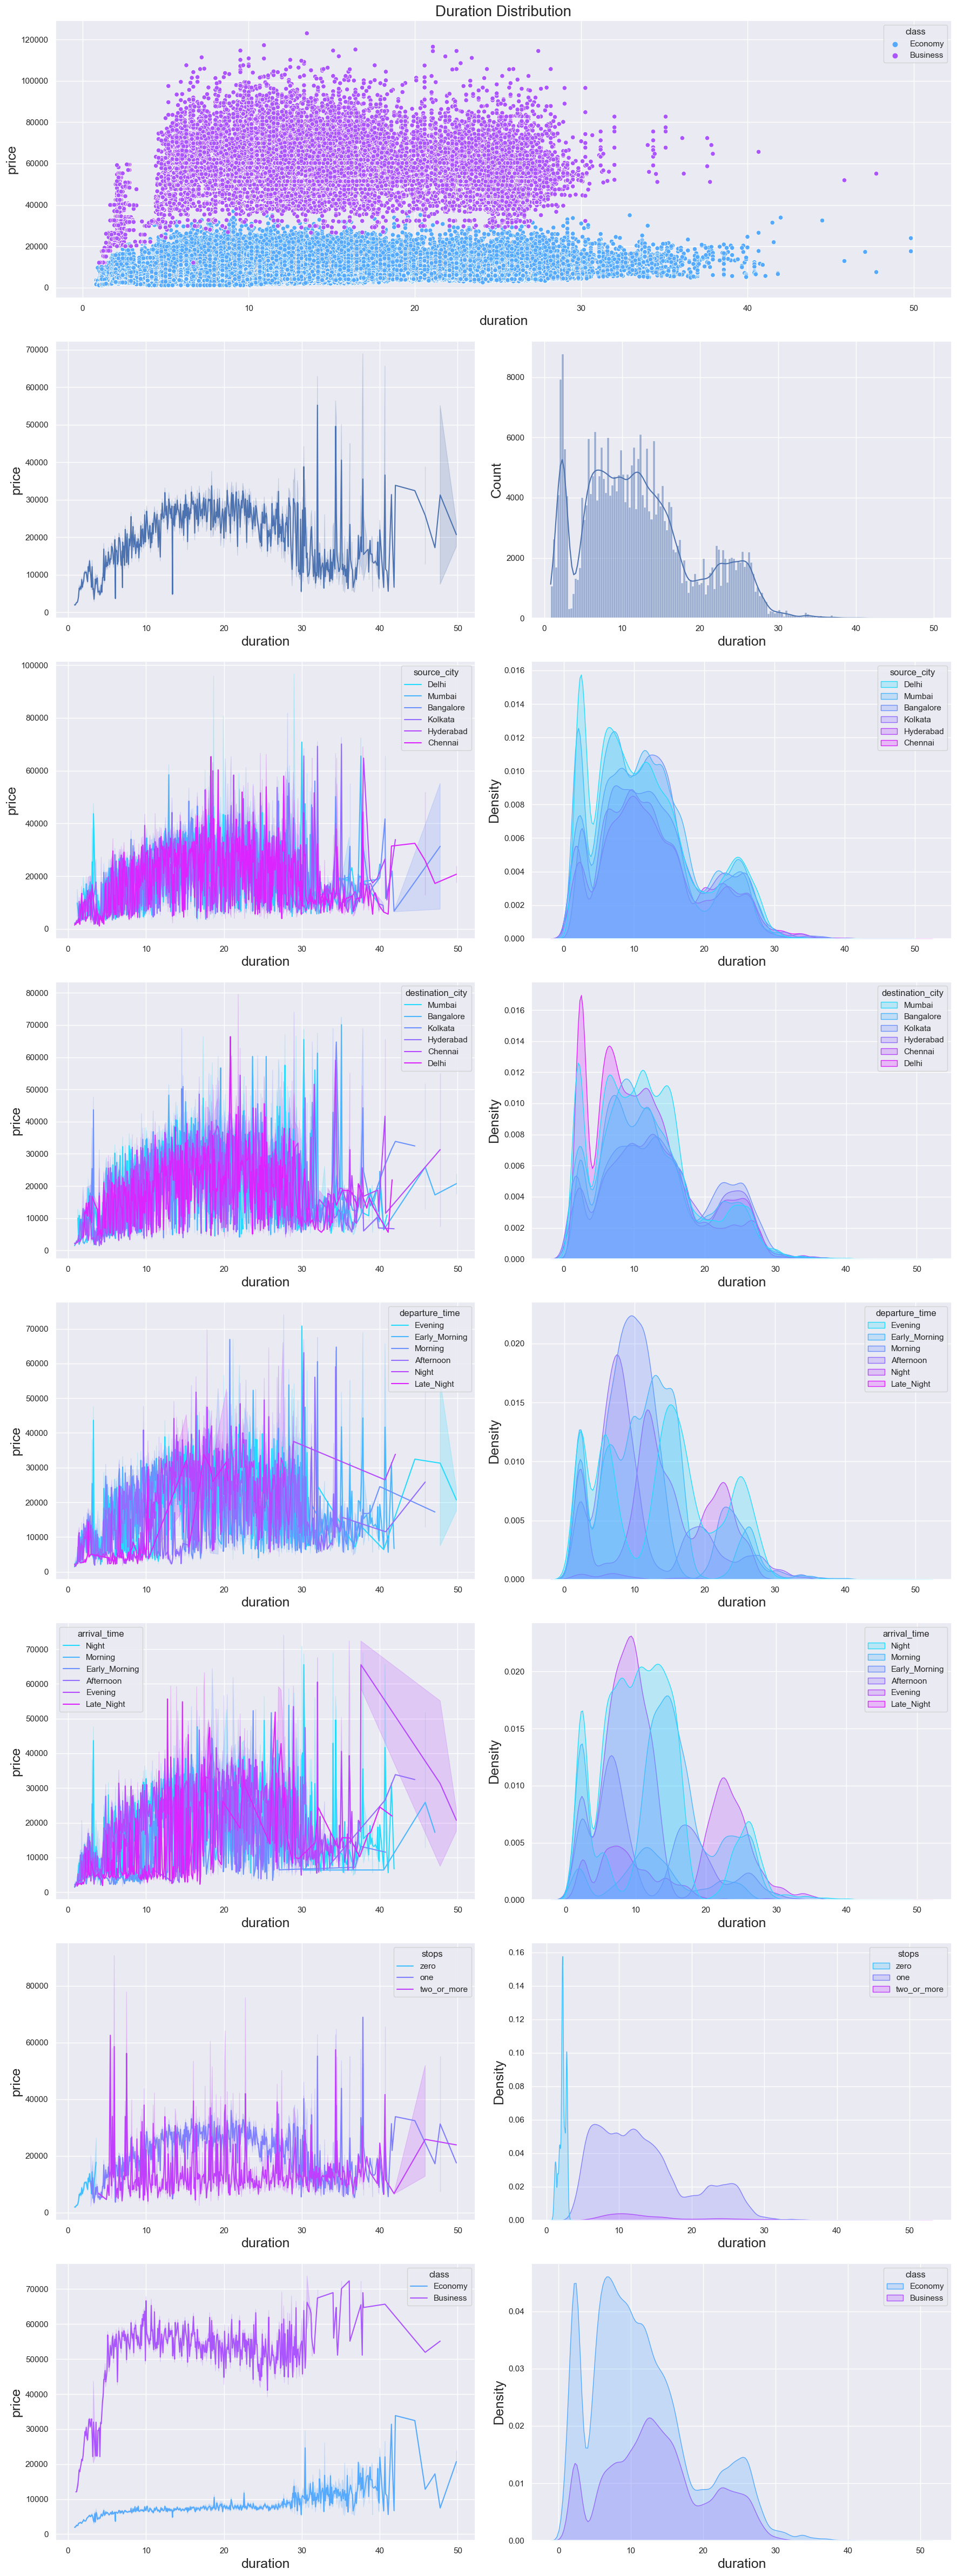

In [137]:
f, ax = plt.subplots(8, 2, figsize=(18,48))
plt.subplot2grid((8,2), (0,0), colspan=2)
plt.title('Duration Distribution')
sns.scatterplot(x='duration', y='price', data=data, palette='cool', hue='class')
plt.subplot2grid((8,2), (1,0))
sns.lineplot(x='duration', y='price', data=data, palette='cool', estimator=np.mean)
plt.subplot2grid((8,2), (1,1))
sns.histplot(x='duration', data=data, kde=True)
plt.subplot2grid((8,2), (2,0))
sns.lineplot(x='duration', y='price', data=data, palette='cool', estimator=np.mean, hue='source_city')
plt.subplot2grid((8,2), (2,1))
sns.kdeplot(x='duration', data=data, palette='cool', shade=True, hue='source_city')
plt.subplot2grid((8,2), (3,0))
sns.lineplot(x='duration', y='price', data=data, palette='cool', estimator=np.mean, hue='destination_city')
plt.subplot2grid((8,2), (3,1))
sns.kdeplot(x='duration', data=data, palette='cool', shade=True, hue='destination_city')
plt.subplot2grid((8,2), (4,0))
sns.lineplot(x='duration', y='price', data=data, palette='cool', estimator=np.mean, hue='departure_time')
plt.subplot2grid((8,2), (4,1))
sns.kdeplot(x='duration', data=data, palette='cool', shade=True, hue='departure_time')
plt.subplot2grid((8,2), (5,0))
sns.lineplot(x='duration', y='price', data=data, palette='cool', estimator=np.mean, hue='arrival_time')
plt.subplot2grid((8,2), (5,1))
sns.kdeplot(x='duration', data=data, palette='cool', shade=True, hue='arrival_time')
plt.subplot2grid((8,2), (6,0))
sns.lineplot(x='duration', y='price', data=data, palette='cool', estimator=np.mean, hue='stops')
plt.subplot2grid((8,2), (6,1))
sns.kdeplot(x='duration', data=data, palette='cool', shade=True, hue='stops')
plt.subplot2grid((8,2), (7,0))
sns.lineplot(x='duration', y='price', data=data, palette='cool', estimator=np.mean, hue='class')
plt.subplot2grid((8,2), (7,1))
sns.kdeplot(x='duration', data=data, palette='cool', shade=True, hue='class')
plt.tight_layout()

## **Categorical Features**

### **class and price**

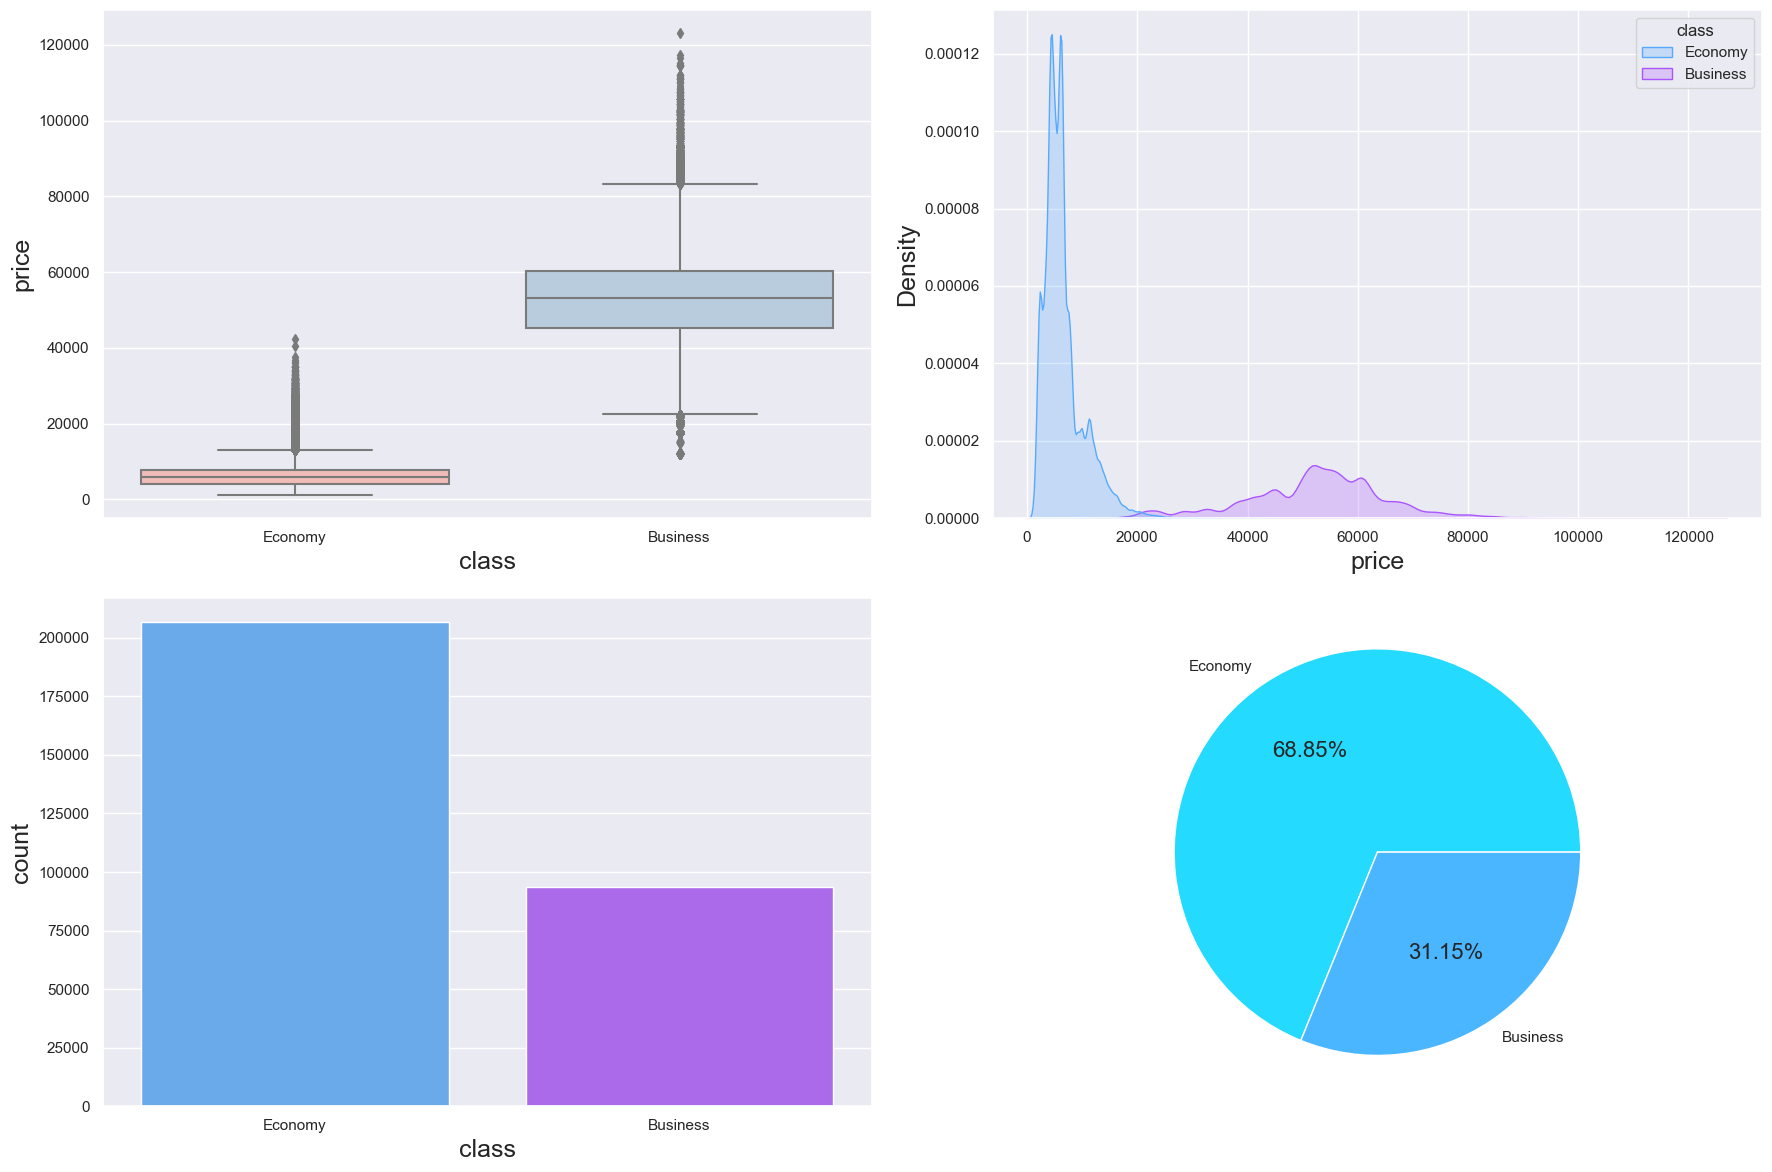

In [86]:
f, ax = plt.subplots(2, 2, figsize=(18,12))
sns.boxplot(ax=ax[0,0], y='price', x='class', data=data, palette='Pastel1')
sns.kdeplot(ax=ax[0,1], x='price', hue='class', data=data, palette='cool', shade=True)
sns.countplot(ax=ax[1,0], x='class', data=data, palette='cool', orient='h')
plt.pie(class_['count'], labels=class_['class'], autopct='%.2f%%', colors=sns.color_palette('cool'))
plt.tight_layout()

### **airline and price**

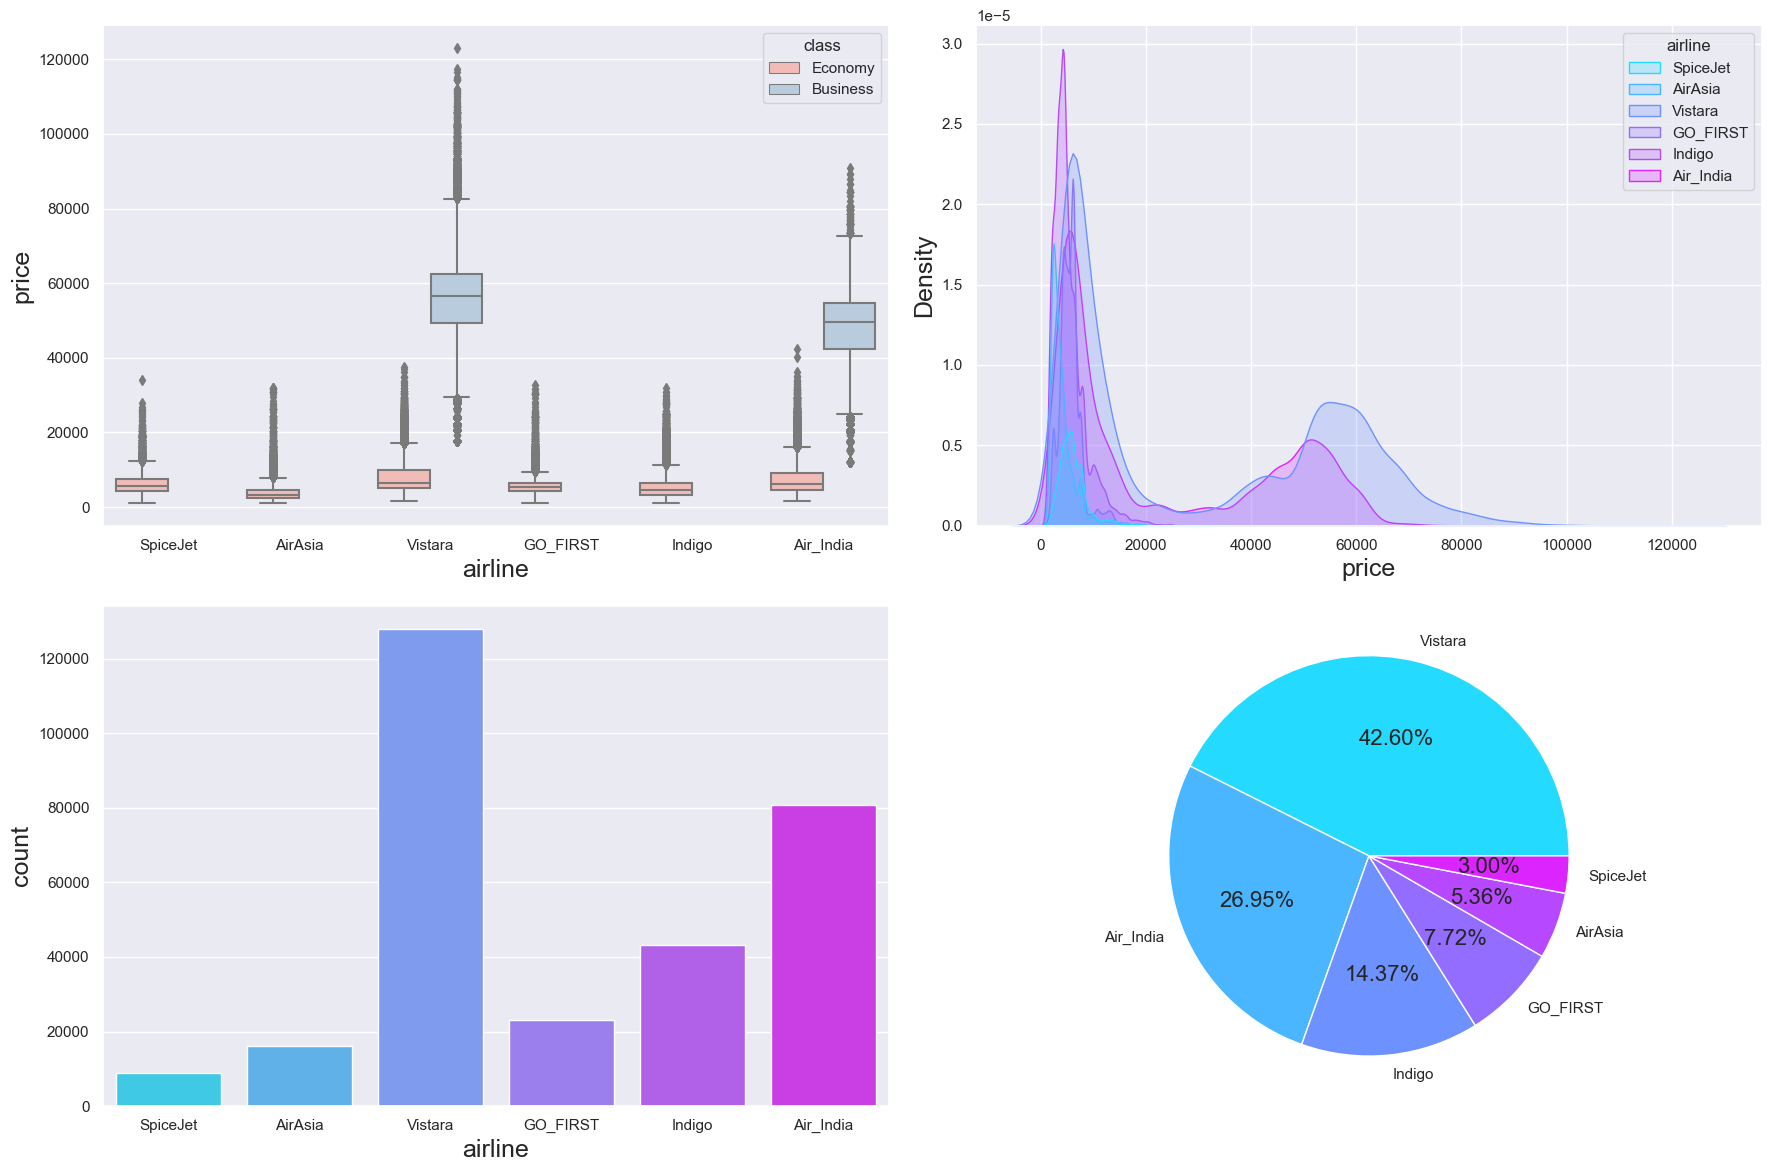

In [87]:
f, ax = plt.subplots(2, 2, figsize=(18,12))
sns.boxplot(ax=ax[0,0], y='price', x='airline', hue='class', data=data, palette='cool')
sns.kdeplot(ax=ax[0,1], x='price', hue='airline', data=data, palette='cool', shade=True)
sns.countplot(ax=ax[1,0], x='airline', data=data, palette='cool', orient='h')
plt.pie(airline['count'], labels=airline.airline, autopct='%.2f%%', colors=sns.color_palette('cool'))
plt.tight_layout()

### **stops and price**

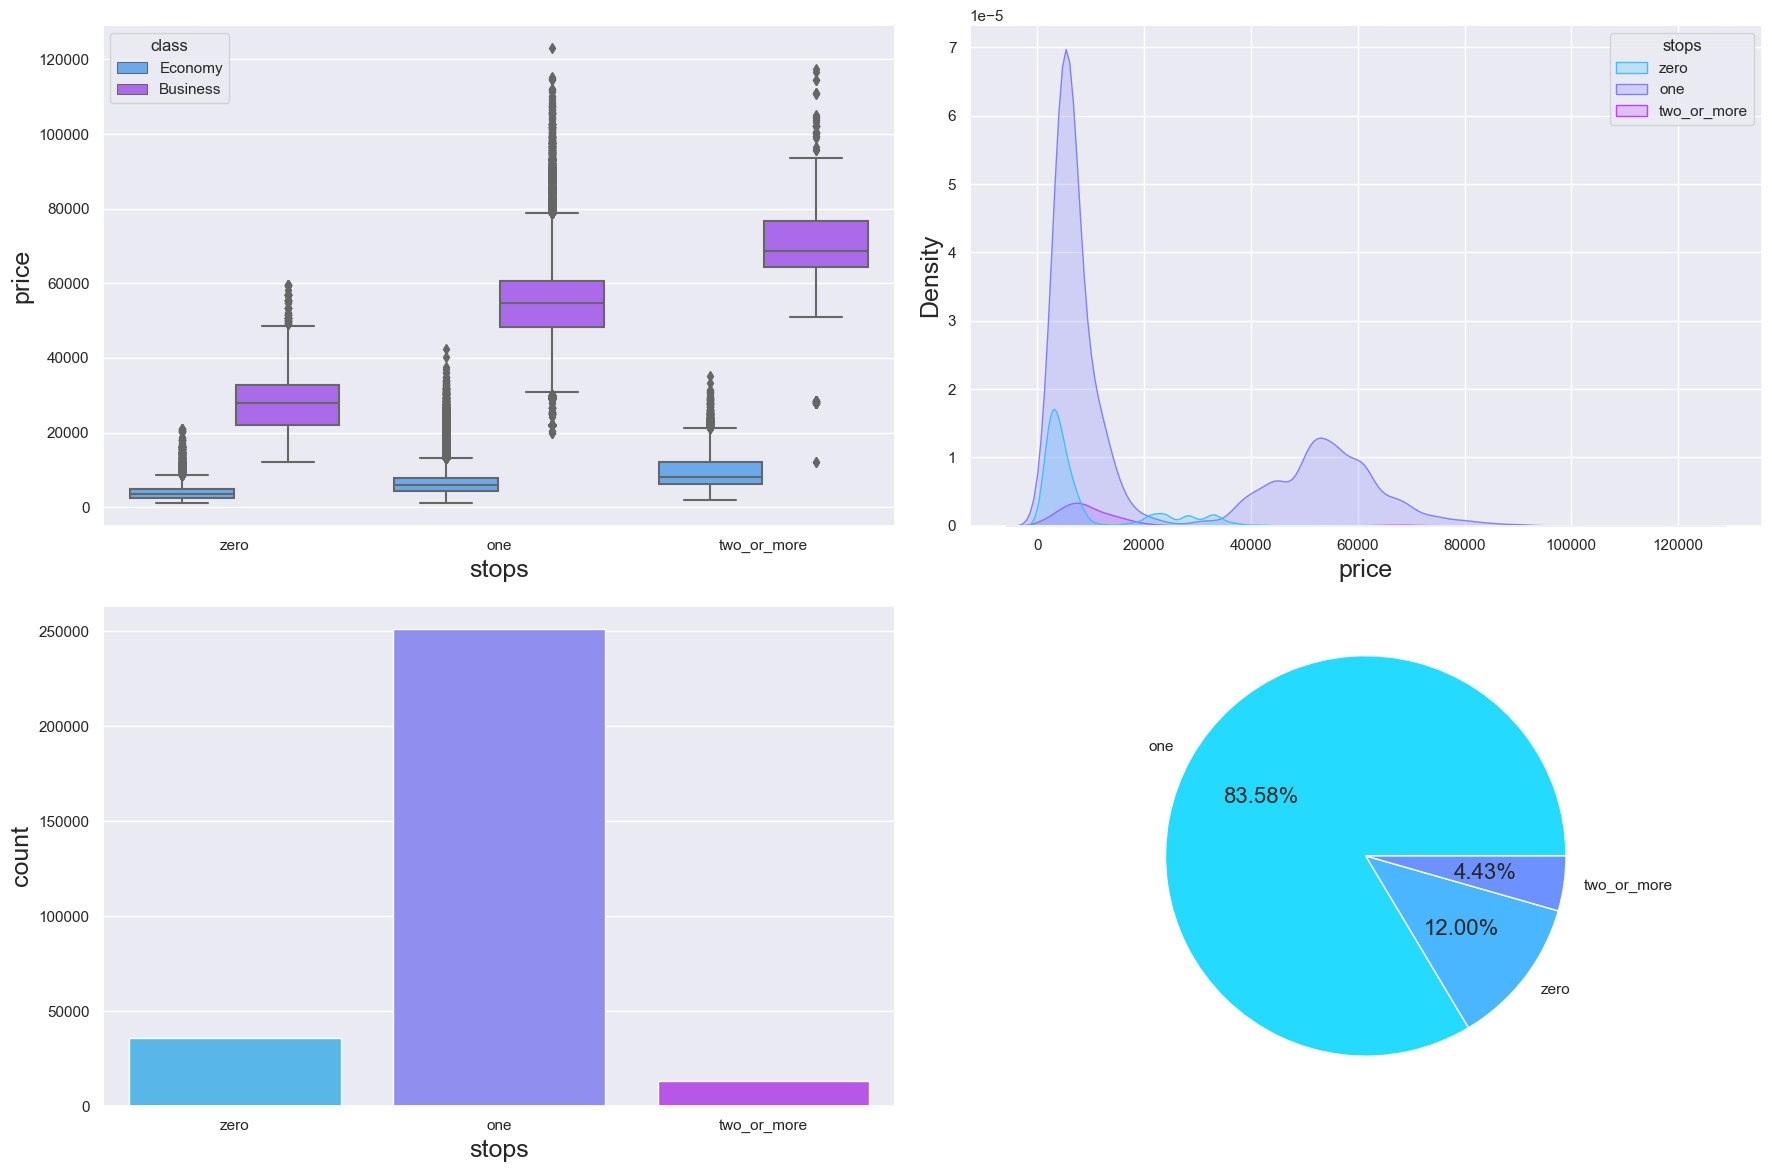

In [108]:
f, ax = plt.subplots(2, 2, figsize=(18,12))
sns.boxplot(ax=ax[0,0], y='price', x='stops', hue='class', data=data, palette='cool')
sns.kdeplot(ax=ax[0,1], x='price', hue='stops', data=data, palette='cool', shade=True)
sns.countplot(ax=ax[1,0], x='stops', data=data, palette='cool', orient='h')
plt.pie(stops['count'], labels=stops.stops, autopct='%.2f%%', colors=sns.color_palette('cool'))
plt.tight_layout()

### **source_city and price**

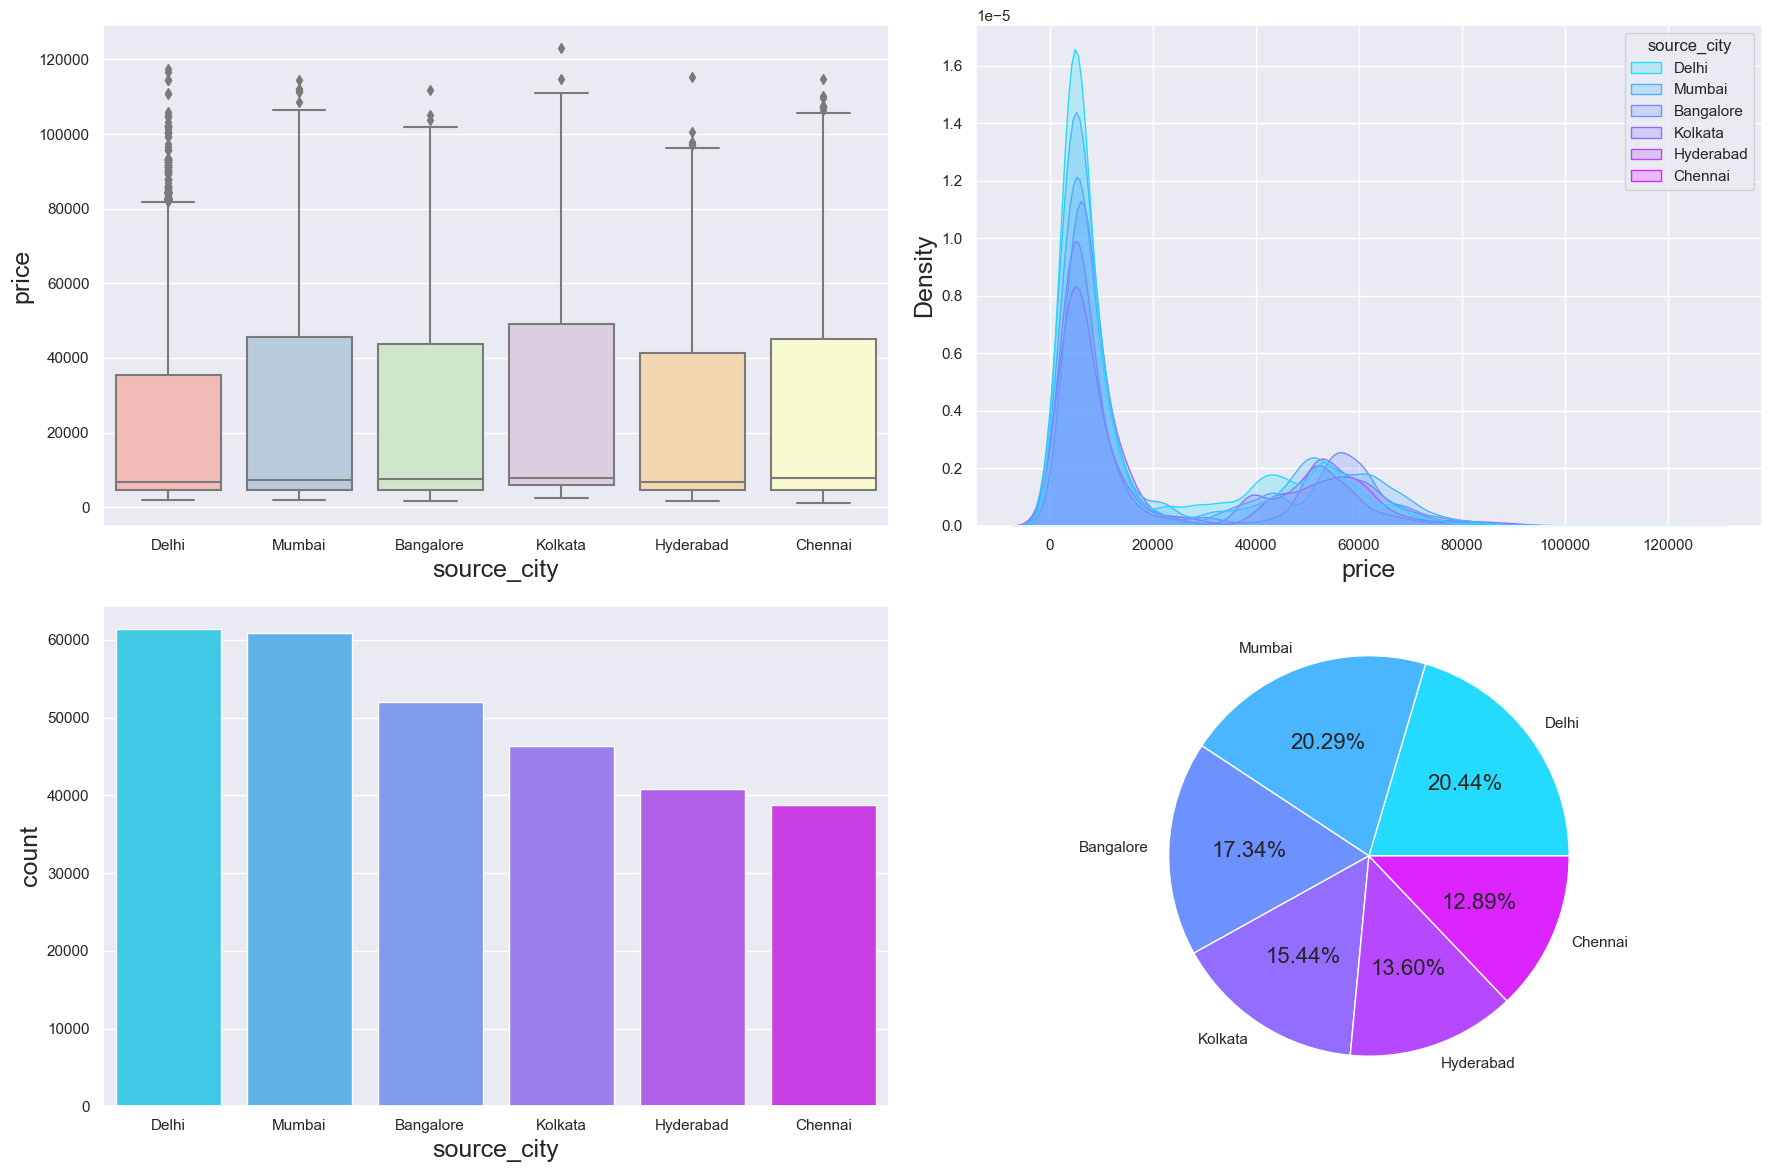

In [88]:
f, ax = plt.subplots(2, 2, figsize=(18,12))
sns.boxplot(ax=ax[0,0], y='price', x='source_city', data=data, palette='cool')
sns.kdeplot(ax=ax[0,1], x='price', hue='source_city', data=data, palette='cool', shade=True)
sns.countplot(ax=ax[1,0], x='source_city', data=data, palette='cool', orient='h')
plt.pie(sourceCity['count'], labels=sourceCity.source_city, autopct='%.2f%%', colors=sns.color_palette('cool'))
plt.tight_layout()

### **destination_city and price**

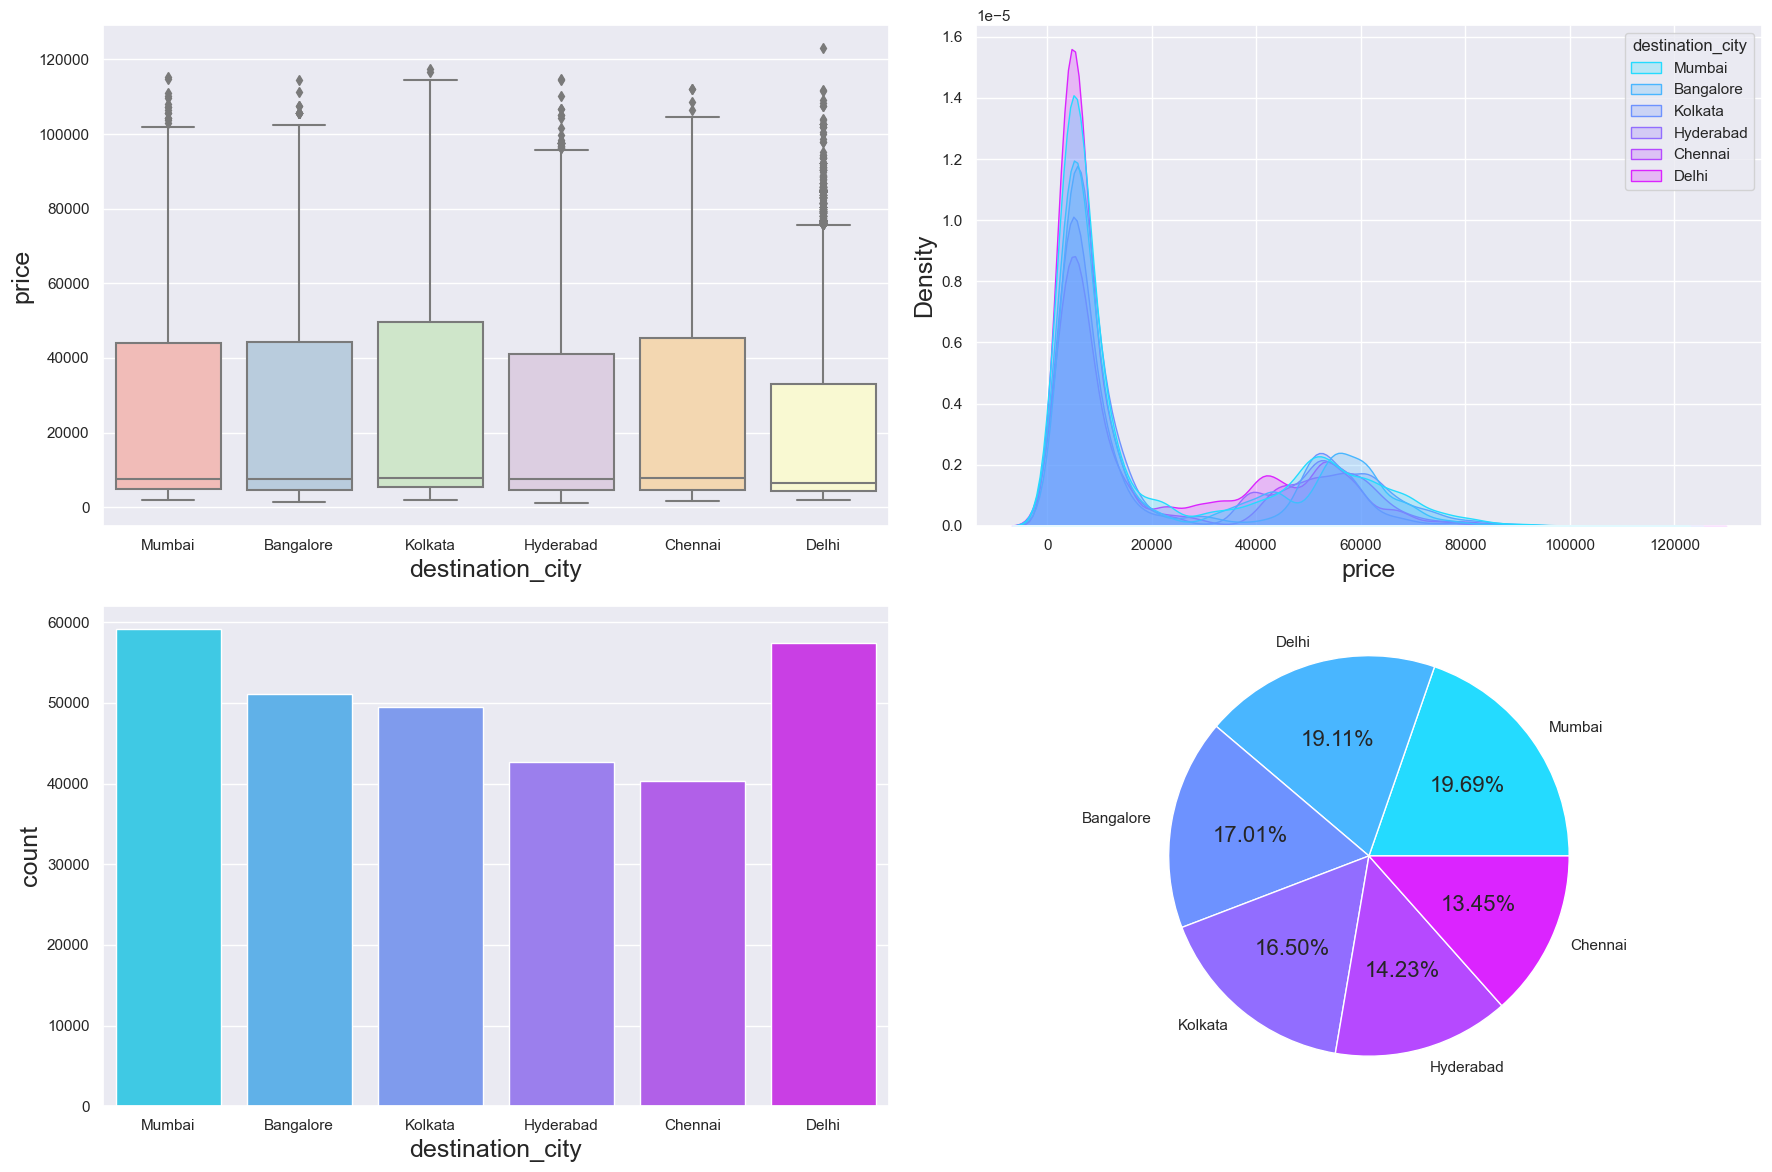

In [89]:
f, ax = plt.subplots(2, 2, figsize=(18,12))
sns.boxplot(ax=ax[0,0], y='price', x='destination_city', data=data, palette='cool')
sns.kdeplot(ax=ax[0,1], x='price', hue='destination_city', data=data, palette='cool', shade=True)
sns.countplot(ax=ax[1,0], x='destination_city', data=data, palette='cool', orient='h')
plt.pie(destinationCity['count'], labels=destinationCity.destination_city, autopct='%.2f%%', colors=sns.color_palette('cool'))
plt.tight_layout()

### **departure_time and price**

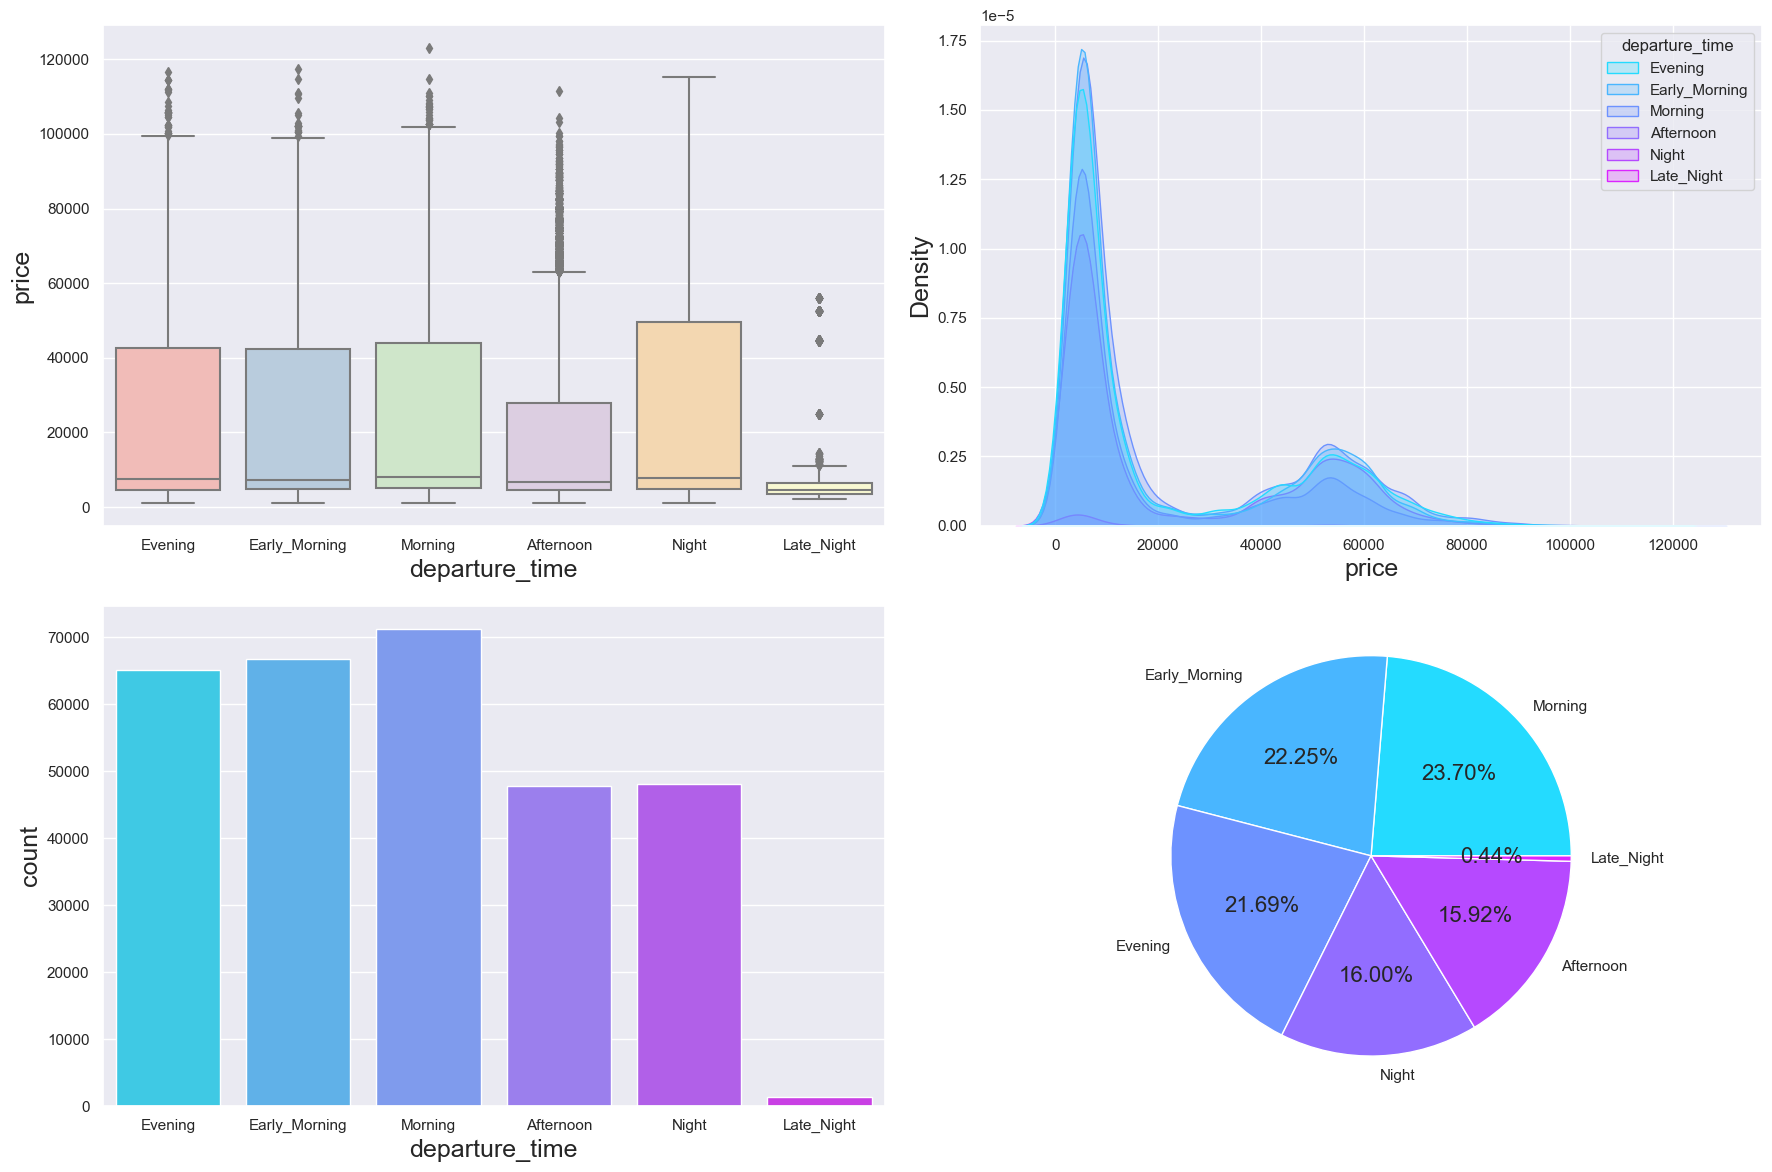

In [90]:
f, ax = plt.subplots(2, 2, figsize=(18,12))
sns.boxplot(ax=ax[0,0], y='price', x='departure_time', data=data, palette='cool')
sns.kdeplot(ax=ax[0,1], x='price', hue='departure_time', data=data, palette='cool', shade=True)
sns.countplot(ax=ax[1,0], x='departure_time', data=data, palette='cool', orient='h')
plt.pie(departureTime['count'], labels=departureTime.departure_time, autopct='%.2f%%', colors=sns.color_palette('cool'))
plt.tight_layout()

### **arrival_time and price**

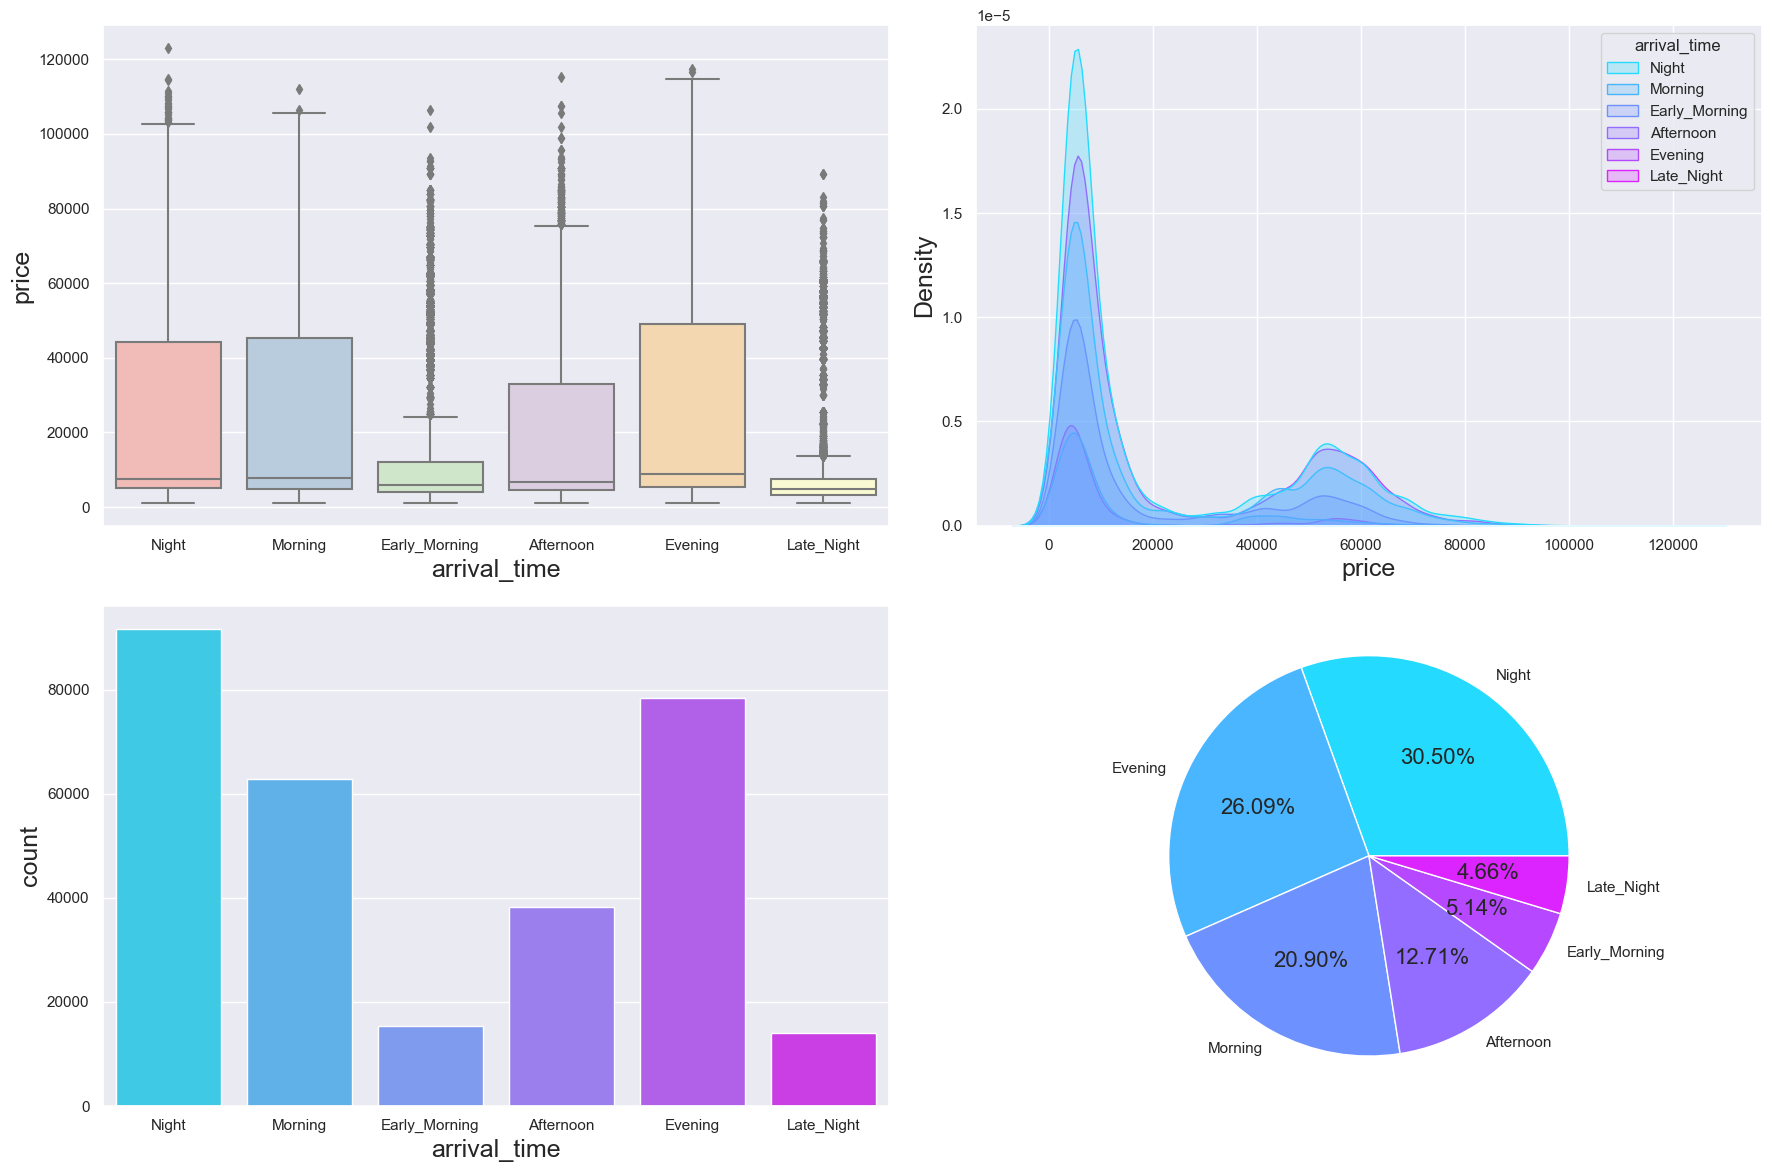

In [91]:
f, ax = plt.subplots(2, 2, figsize=(18,12))
sns.boxplot(ax=ax[0,0], y='price', x='arrival_time', data=data, palette='cool')
sns.kdeplot(ax=ax[0,1], x='price', hue='arrival_time', data=data, palette='cool', shade=True)
sns.countplot(ax=ax[1,0], x='arrival_time', data=data, palette='cool', orient='h')
plt.pie(arrivalTime['count'], labels=arrivalTime.arrival_time, autopct='%.2f%%', colors=sns.color_palette('cool'))
plt.tight_layout()

## **Feature Engineering**

In [92]:
dataFeatureEngineering = data.copy()
dataFeatureEngineering['source_destination_city'] = dataFeatureEngineering.source_city + '-' + dataFeatureEngineering.destination_city
dataFeatureEngineering.head()

Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  \
0          Night           Mumbai  Economy      2.17          1   5953   
1        Morning           Mumbai  Economy      2.33          1   5953   
2  Early_Morning           Mumbai  Economy      2.17          1   5956   
3      Afternoon           Mumbai  Economy      2.25          1   5955   
4        Morning           Mumbai  Economy      2.33          1   5955   

  source_destination_city  
0            Delhi-Mumbai  
1            Delhi-Mumbai  
2            Delhi-Mumbai  
3            Delhi-Mumbai  
4            Delhi-Mumbai

In [120]:
dfe = dataFeatureEngineering.groupby(['source_destination_city', 'stops', 'duration'], as_index=False). \
  aggregate(count = ('price', 'count'),
            avg = ('price', 'mean'))

In [124]:
dfe[dfe.stops=='zero'].sort_values(['source_destination_city', 'duration']).reset_index(drop=True).head(30)

source_destination_city stops  duration  count           avg
0        Bangalore-Chennai  zero      0.83     37   2185.783784
1        Bangalore-Chennai  zero      0.92     16   1999.562500
2        Bangalore-Chennai  zero      1.00    152   2244.144737
3        Bangalore-Chennai  zero      1.08    200   2341.565000
4        Bangalore-Chennai  zero      1.17     75   2612.293333
5          Bangalore-Delhi  zero      2.58    271  19620.974170
6          Bangalore-Delhi  zero      2.67    432  17830.247685
7          Bangalore-Delhi  zero      2.75    667  13212.320840
8          Bangalore-Delhi  zero      2.83    210   5100.852381
9          Bangalore-Delhi  zero      2.92    516  10318.451550
10         Bangalore-Delhi  zero      3.00    115   8622.713043
11     Bangalore-Hyderabad  zero      1.00     92   2541.195652
12     Bangalore-Hyderabad  zero      1.08    117   3016.000000
13     Bangalore-Hyderabad  zero      1.17    265   2504.022642
14     Bangalore-Hyderabad  zero      1.25    136   3276.713235
15     Bangalore-Hyderabad  zero      1.33    153   4071.830065
16     Bangalore-Hyderabad  zero      1.42     42   2665.642857
17     Bangalore-Hyderabad  zero      1.50     53   2814.245283
18     Bangalore-Hyderabad  zero      1.67     18   4701.166667
19       Bangalore-Kolkata  zero      2.33     61   3951.852459
20       Bangalore-Kolkata  zero      2.42    108   4451.212963
21       Bangalore-Kolkata  zero      2.50    201   4061.756219
22       Bangalore-Kolkata  zero      2.58    169   6348.704142
23       Bangalore-Kolkata  zero      2.67    123   4528.634146
24       Bangalore-Kolkata  zero      2.75      1   5179.000000
25       Bangalore-Kolkata  zero      3.17      5   3393.000000
26        Bangalore-Mumbai  zero      1.33     18   4716.222222
27        Bangalore-Mumbai  zero      1.58    136   9317.867647
28        Bangalore-Mumbai  zero      1.67    214   2961.658879
29        Bangalore-Mumbai  zero      1.75    385   9070.597403

In [111]:
dfe[dfe.stops=='one'].sort_values('source_destination_city').reset_index(drop=True)

source_destination_city stops  duration  count
0          Bangalore-Chennai   one      3.75      4
1          Bangalore-Chennai   one     24.83     10
2          Bangalore-Chennai   one     24.58     65
3          Bangalore-Chennai   one     24.50      6
4          Bangalore-Chennai   one     24.42     12
...                      ...   ...       ...    ...
5799          Mumbai-Kolkata   one     11.92     39
5800          Mumbai-Kolkata   one     12.00      9
5801          Mumbai-Kolkata   one     12.08    228
5802          Mumbai-Kolkata   one     10.92      3
5803          Mumbai-Kolkata   one     37.58      2

[5804 rows x 4 columns]

In [105]:
dfe[dfe.stops=='two_or_more'].sort_values('source_destination_city').reset_index(drop=True)

source_destination_city        stops  count
0        Bangalore-Chennai  two_or_more    503
1          Bangalore-Delhi  two_or_more    216
2      Bangalore-Hyderabad  two_or_more    425
3        Bangalore-Kolkata  two_or_more    774
4         Bangalore-Mumbai  two_or_more    275
5        Chennai-Bangalore  two_or_more    599
6            Chennai-Delhi  two_or_more    209
7        Chennai-Hyderabad  two_or_more    591
8          Chennai-Kolkata  two_or_more    256
9           Chennai-Mumbai  two_or_more     46
10         Delhi-Bangalore  two_or_more    486
11           Delhi-Chennai  two_or_more   1213
12         Delhi-Hyderabad  two_or_more    170
13           Delhi-Kolkata  two_or_more    984
14            Delhi-Mumbai  two_or_more     73
15     Hyderabad-Bangalore  two_or_more    332
16       Hyderabad-Chennai  two_or_more    266
17         Hyderabad-Delhi  two_or_more     32
18       Hyderabad-Kolkata  two_or_more    433
19        Hyderabad-Mumbai  two_or_more    305
20       Kolkata-Bangalore  two_or_more    813
21         Kolkata-Chennai  two_or_more    518
22           Kolkata-Delhi  two_or_more    263
23       Kolkata-Hyderabad  two_or_more    543
24          Kolkata-Mumbai  two_or_more    630
25        Mumbai-Bangalore  two_or_more    444
26          Mumbai-Chennai  two_or_more    739
27            Mumbai-Delhi  two_or_more     65
28        Mumbai-Hyderabad  two_or_more    335
29          Mumbai-Kolkata  two_or_more    748

In [93]:
len(dataFeatureEngineering.source_destination_city.value_counts())

30

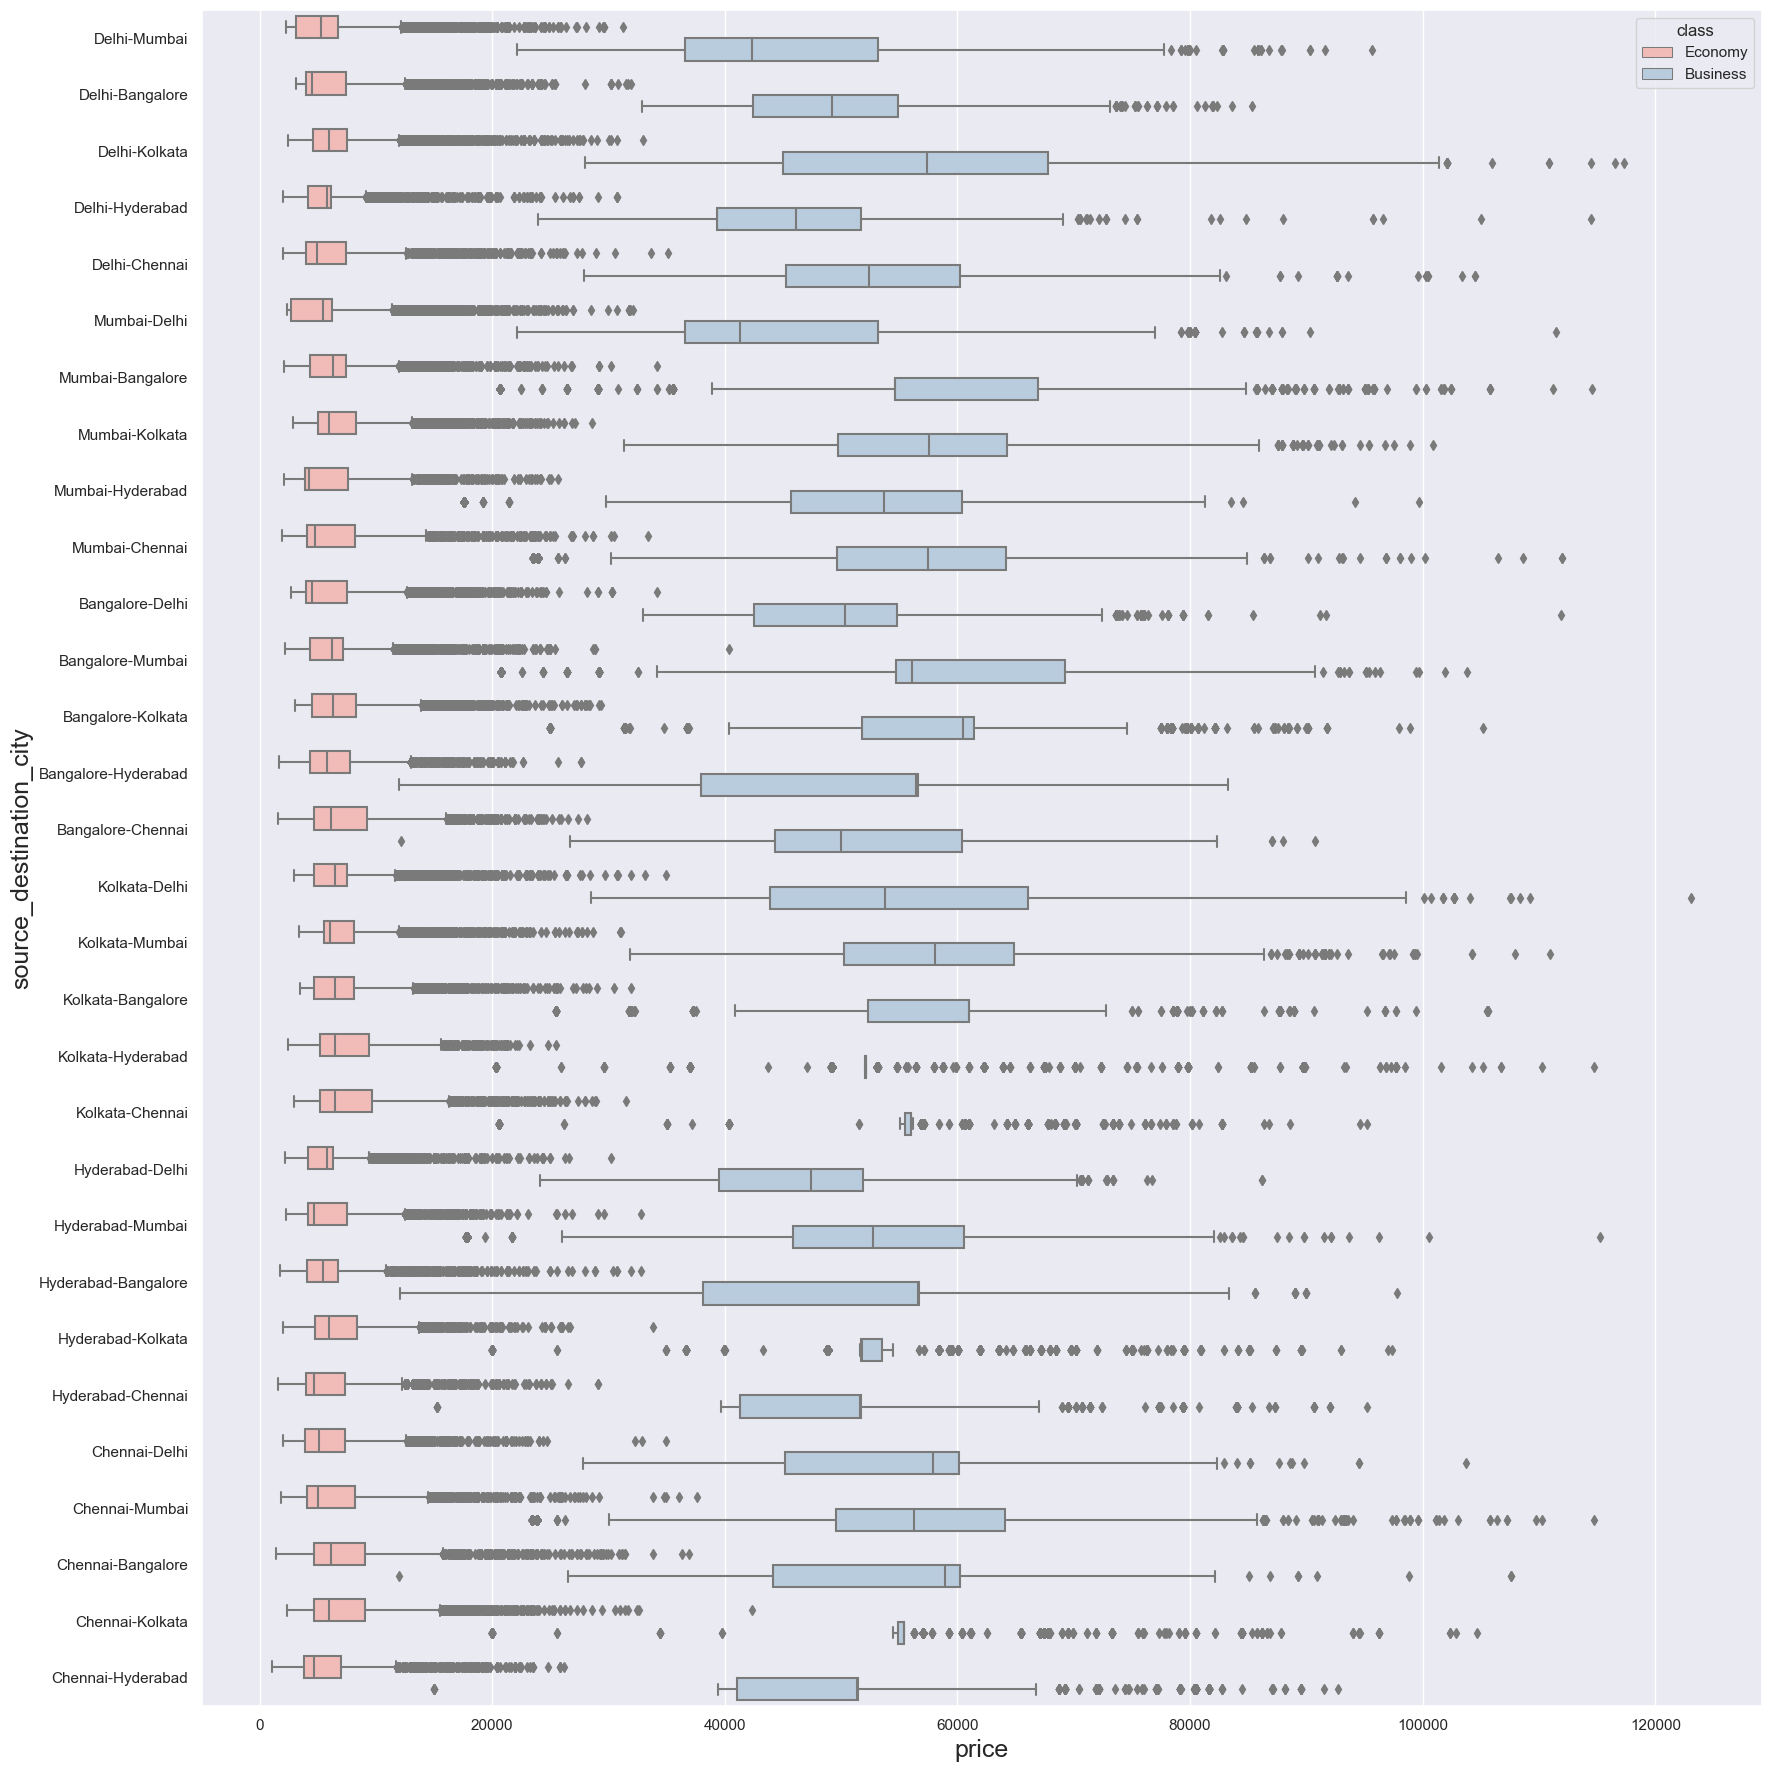

In [94]:
f, ax = plt.subplots(figsize=(18,18))

sns.boxplot(y='source_destination_city', x='price', hue='class', data=dataFeatureEngineering, palette='Pastel1')

plt.tight_layout()

## **Outliers**

In [21]:
def findOutliers(df, dfColumn):
    q1 = np.quantile(df[dfColumn], 0.25)
    q3 = np.quantile(df[dfColumn], 0.75)
    iqr = q3 - q1
    cutOffWhisker = iqr * 1.5
    lowerWhisker = q1 - cutOffWhisker
    upperWhisker = q3 + cutOffWhisker
    outliersUpperDf = df[df[dfColumn] > upperWhisker]
    outliersLowerDf = df[df[dfColumn] < lowerWhisker]
    outliers = {
      'lowerWhisker': lowerWhisker,
      'upperWhisker': upperWhisker,
      'outliersUpperDf': outliersUpperDf,
      'outliersLowerDf': outliersLowerDf,
    }
    return outliers
    # return q1,q3

### **Duration**

In [22]:
durationOutliers = findOutliers(data, 'duration')

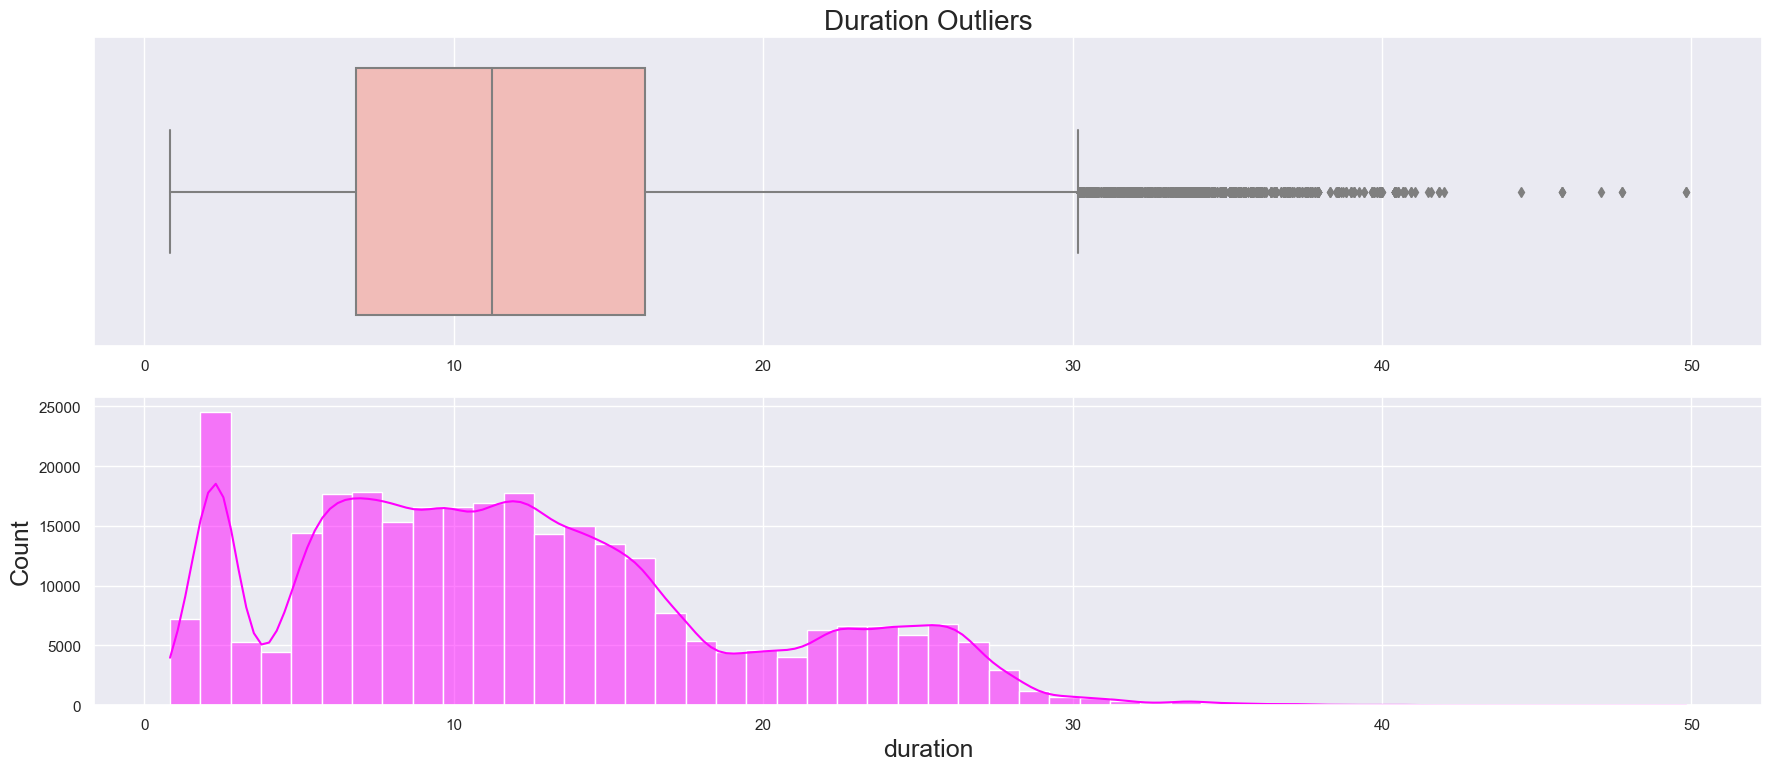

In [20]:
f, ax = plt.subplots(2, 1)
sns.boxplot(x='duration', data=data, palette='Pastel1', ax=ax[0])
sns.histplot(x='duration', data=data, color='magenta', bins=50, kde=True, ax=ax[1])

ax[0].set_title('Duration Outliers')
ax[0].set_xlabel('')

f.tight_layout()

Text(0.5, 1.0, 'Outliers Detection (Duration)')

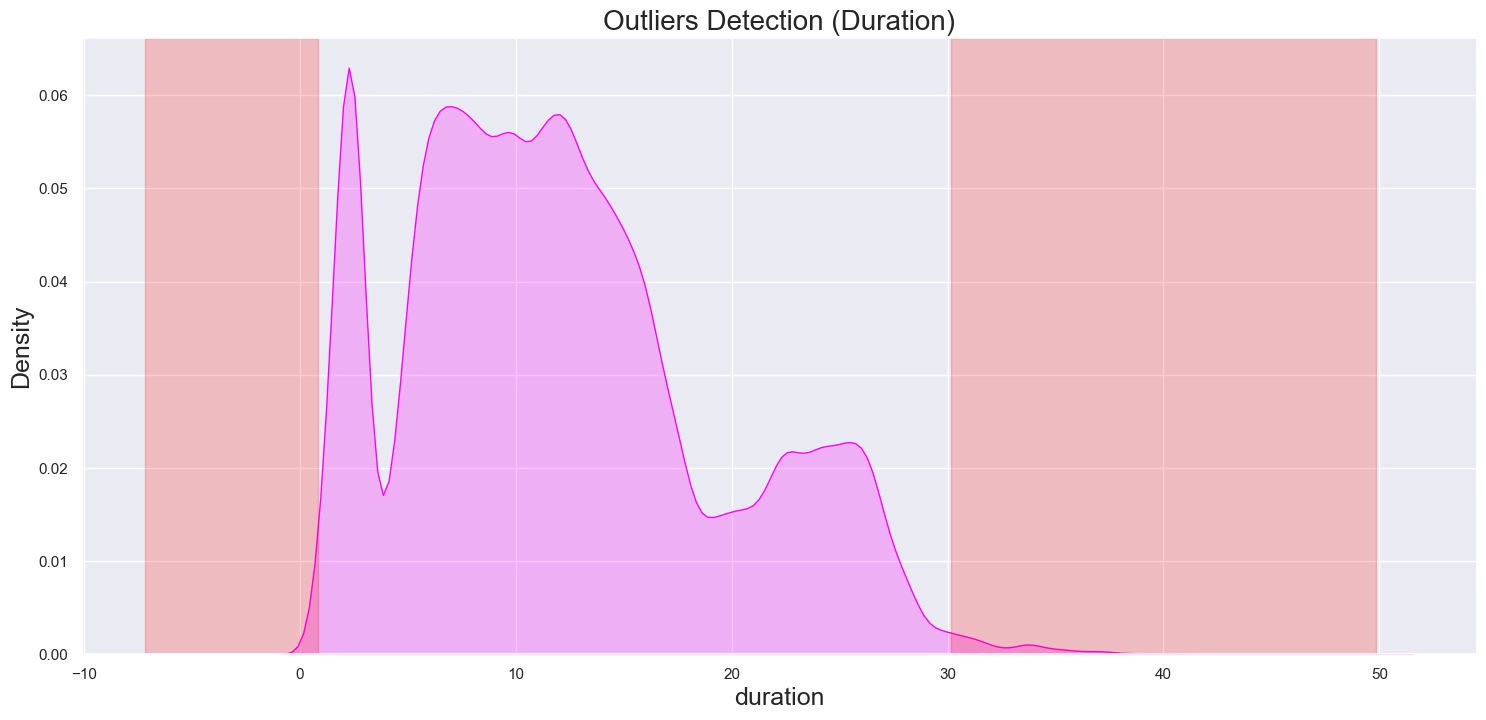

In [21]:
f, ax = plt.subplots()
sns.kdeplot(x=data.duration, color='magenta', shade=True)
plt.axvspan(xmin=durationOutliers['lowerWhisker'], xmax=data.duration.min(), alpha=0.2, color='red')
plt.axvspan(xmin=durationOutliers['upperWhisker'], xmax=data.duration.max(), alpha=0.2, color='red')

plt.title('Outliers Detection (Duration)')

### **Days Left**

In [23]:
daysLeftOurliers = findOutliers(data, 'days_left')

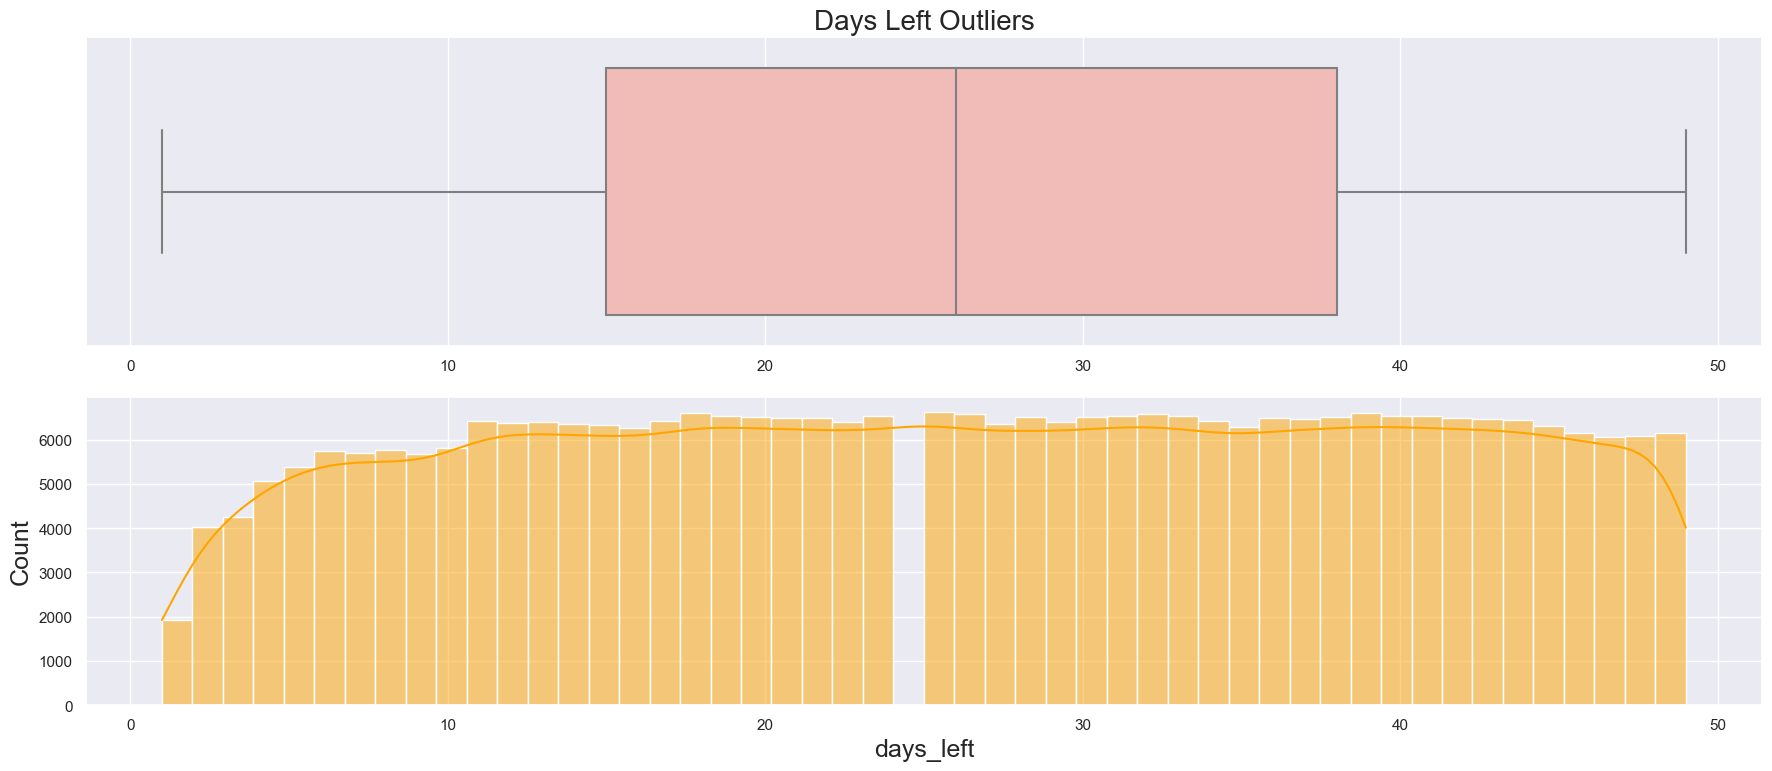

In [23]:
f, ax = plt.subplots(2, 1)
sns.boxplot(x='days_left', data=data, palette='Pastel1', ax=ax[0])
sns.histplot(x='days_left', data=data, color='orange', bins=50, kde=True, ax=ax[1])

ax[0].set_title('Days Left Outliers')
ax[0].set_xlabel('')

f.tight_layout()

Text(0.5, 1.0, 'Outliers Detection (Days Left)')

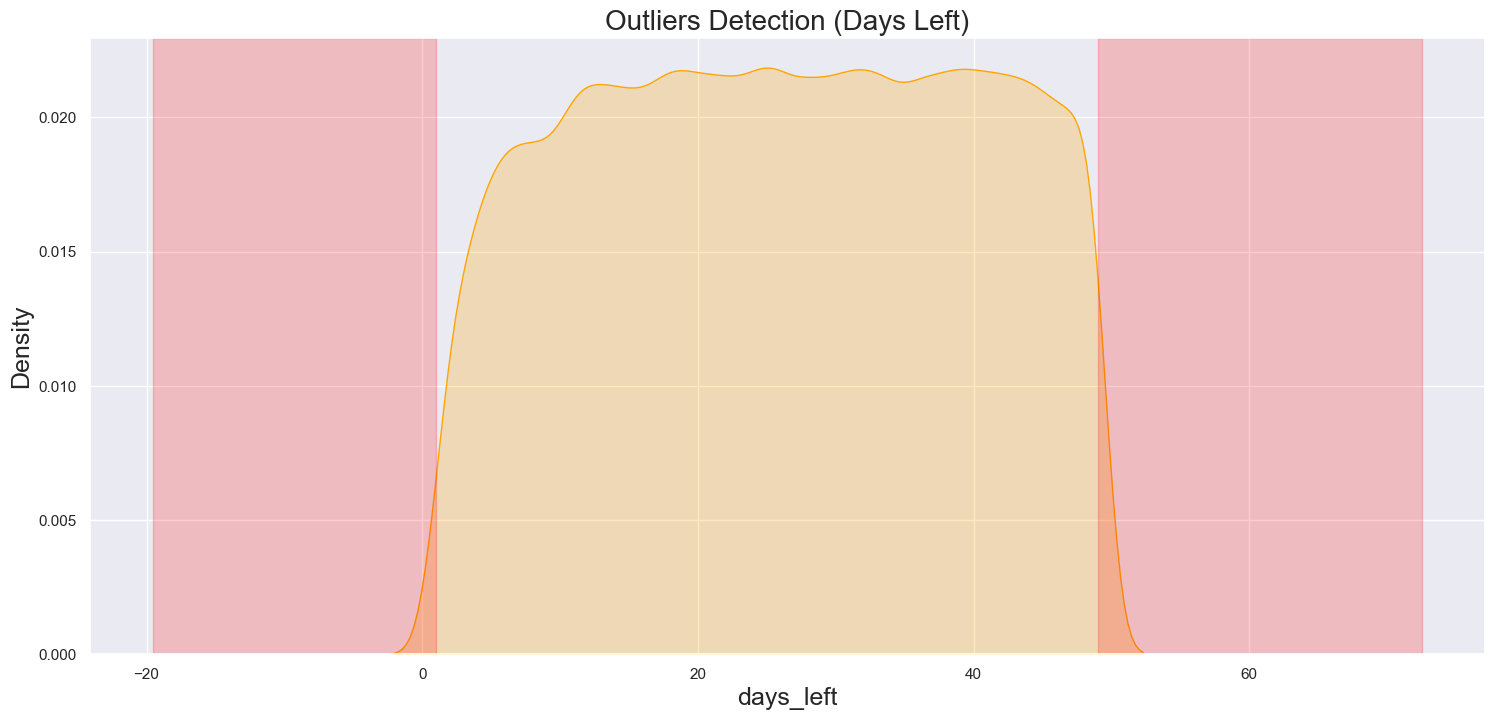

In [24]:
f, ax = plt.subplots()
sns.kdeplot(x=data.days_left, color='orange', shade=True)
plt.axvspan(xmin=daysLeftOurliers['lowerWhisker'], xmax=data.days_left.min(), alpha=0.2, color='red')
plt.axvspan(xmin=daysLeftOurliers['upperWhisker'], xmax=data.days_left.max(), alpha=0.2, color='red')

plt.title('Outliers Detection (Days Left)')

### **Price**

In [24]:
priceOutliers = findOutliers(data, 'price')

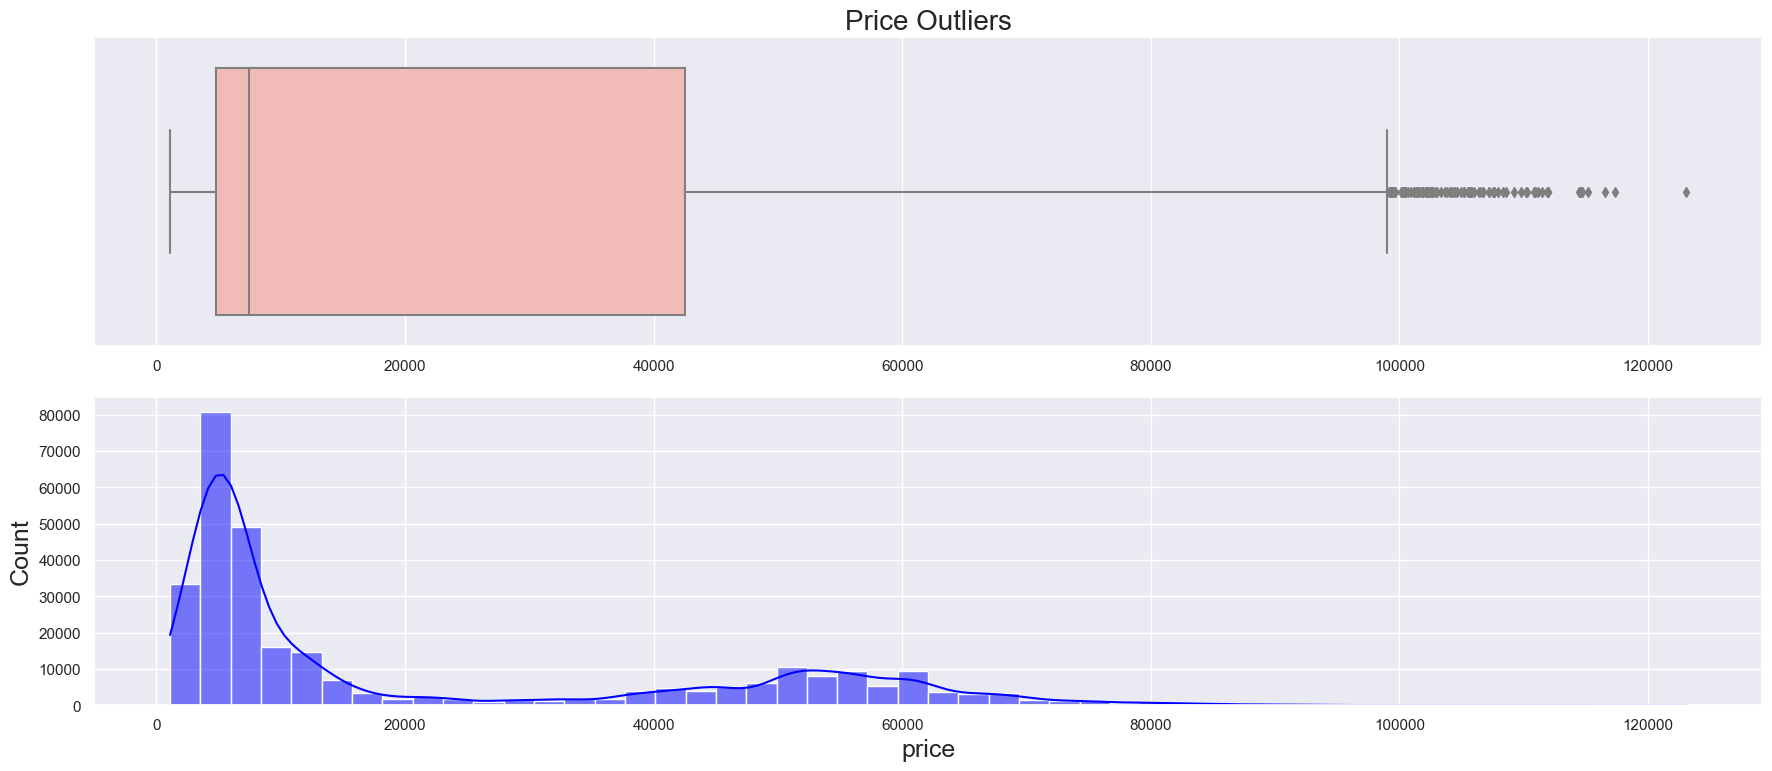

In [26]:
f, ax = plt.subplots(2, 1)
sns.boxplot(x='price', data=data, palette='Pastel1', ax=ax[0])
sns.histplot(x='price', data=data, color='blue', bins=50, kde=True, ax=ax[1])

ax[0].set_title('Price Outliers')
ax[0].set_xlabel('')

f.tight_layout()

Text(0.5, 1.0, 'Outliers Detection (Price)')

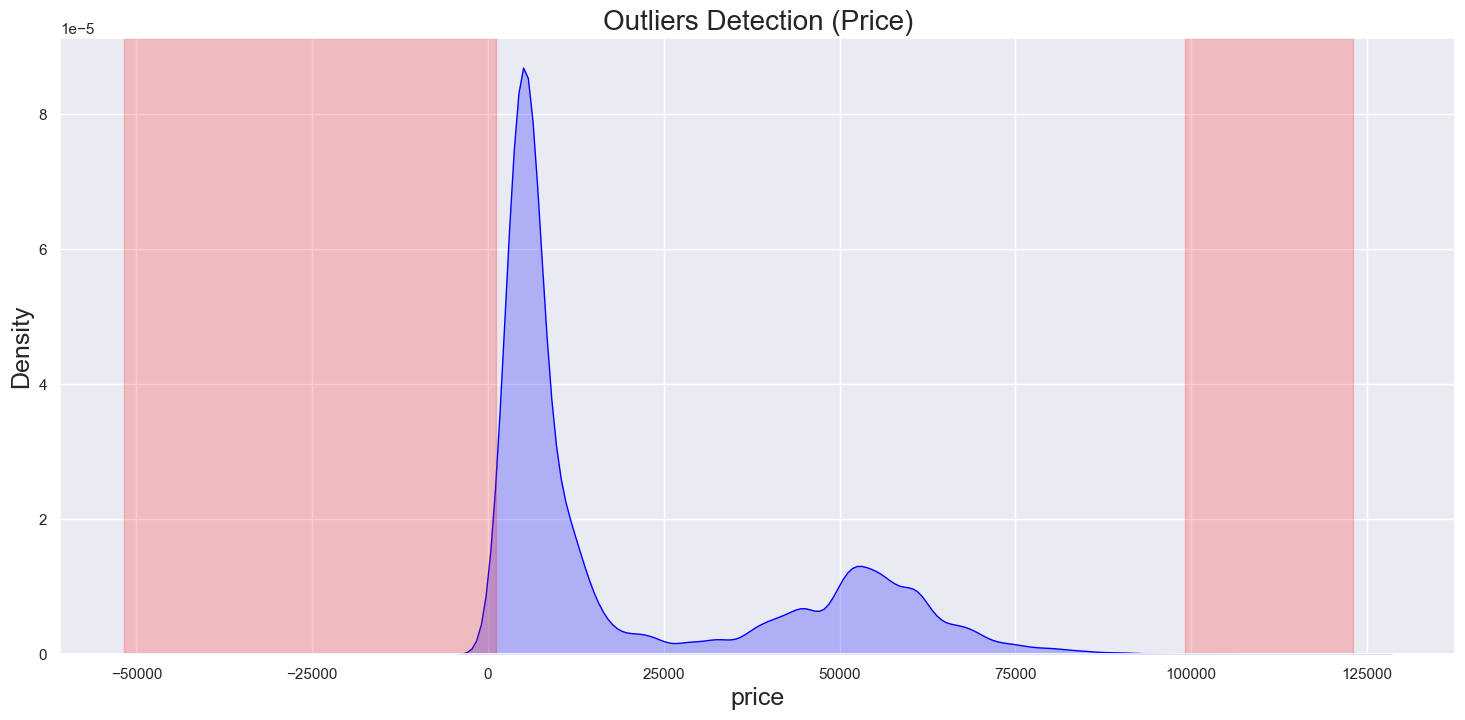

In [27]:
f, ax = plt.subplots()
sns.kdeplot(x=data.price, color='blue', shade=True)
plt.axvspan(xmin=priceOutliers['lowerWhisker'], xmax=data.price.min(), alpha=0.2, color='red')
plt.axvspan(xmin=priceOutliers['upperWhisker'], xmax=data.price.max(), alpha=0.2, color='red')

plt.title('Outliers Detection (Price)')

# **MODEL PREPARATION**

In [27]:
dfModel = data.copy()
dfModel.drop(['Unnamed: 0','flight'], axis=1, inplace=True)
dfModel.head(5)

airline source_city departure_time stops   arrival_time destination_city  \
0  SpiceJet       Delhi        Evening  zero          Night           Mumbai   
1  SpiceJet       Delhi  Early_Morning  zero        Morning           Mumbai   
2   AirAsia       Delhi  Early_Morning  zero  Early_Morning           Mumbai   
3   Vistara       Delhi        Morning  zero      Afternoon           Mumbai   
4   Vistara       Delhi        Morning  zero        Morning           Mumbai   

     class  duration  days_left  price  
0  Economy      2.17          1   5953  
1  Economy      2.33          1   5953  
2  Economy      2.17          1   5956  
3  Economy      2.25          1   5955  
4  Economy      2.33          1   5955

## **Reduce Size --> Convert to Categorical**

In [28]:
dfModel.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 134.8 MB


In [30]:
categoryColumns = []
for x in dfModel.columns:
  if dfModel[x].dtype == 'object':
    dfModel[x] = dfModel[x].astype('category')
    categoryColumns.append(x)
categoryColumns   

['airline',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class']

In [31]:
dfModel.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   airline           300153 non-null  category
 1   source_city       300153 non-null  category
 2   departure_time    300153 non-null  category
 3   stops             300153 non-null  category
 4   arrival_time      300153 non-null  category
 5   destination_city  300153 non-null  category
 6   class             300153 non-null  category
 7   duration          300153 non-null  float64 
 8   days_left         300153 non-null  int64   
 9   price             300153 non-null  int64   
dtypes: category(7), float64(1), int64(2)
memory usage: 8.9 MB


## **Remove Outliers**

In [35]:
dfModelRemoveOutliers = dfModel.copy()
print('Dimension before remove outliers:', dfModelRemoveOutliers.shape)
dfModelRemoveOutliers = dfModelRemoveOutliers[((dfModelRemoveOutliers.price > priceOutliers['lowerWhisker']) & (dfModelRemoveOutliers.price < priceOutliers['upperWhisker'])) &
                    ((dfModelRemoveOutliers.duration > durationOutliers['lowerWhisker']) & (dfModelRemoveOutliers.duration < durationOutliers['upperWhisker'])) &
                    ((dfModelRemoveOutliers.days_left > daysLeftOurliers['lowerWhisker']) & (dfModelRemoveOutliers.days_left < daysLeftOurliers['upperWhisker']))].reset_index(drop=True)
print('Dimension after remove outliers:', dfModelRemoveOutliers.shape)
dfModelRemoveOutliers
dfModelRemoveOutliers.to_csv(index=False, path_or_buf='./db/clean-data-only-remove-outliers.csv')

Dimension before remove outliers: (300153, 10)
Dimension after remove outliers: (297920, 10)


## **Feature Encoding**

In [36]:
# Label --> stops, class || sisanya one-hot
oneHotColumns = []
labelColumns = []

for x in categoryColumns:
  if x in ['stops', 'class']: labelColumns.append(x)
  else: oneHotColumns.append(x)

print(oneHotColumns)
print(labelColumns)

['airline', 'source_city', 'departure_time', 'arrival_time', 'destination_city']
['stops', 'class']


In [37]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def labelEncoderFunc(data, cols):
  for value in cols:
    data[value] = LabelEncoder().fit_transform(data[value])
  return data

def oheFunc(data, cols):
  ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
  ohe.fit(data[cols])
  dfOhe = pd.DataFrame(ohe.transform(data[cols]), columns=ohe.get_feature_names_out())
  data = pd.concat([data, dfOhe], axis=1).drop(columns=cols)
  return data


In [70]:
dfr = pd.read_csv('./db/clean-data-only-remove-outliers.csv')
oheColumns = ['airline', 'source_city', 'destination_city', 'departure_time', 'arrival_time']
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
ohe.fit(dfr[oheColumns])
# dfOhe = pd.DataFrame(ohe.transform(df[oheColumns]).toarray(), columns=ohe.get_feature_names_out())
dfOhe = pd.DataFrame(ohe.transform(dfr[oheColumns]), columns=ohe.get_feature_names_out())
dfr = pd.concat([dfr, dfOhe], axis=1).drop(columns=oheColumns)
dfr.head()


stops    class  duration  days_left  price  airline_AirAsia  \
0  zero  Economy      2.17          1   5953              0.0   
1  zero  Economy      2.33          1   5953              0.0   
2  zero  Economy      2.17          1   5956              1.0   
3  zero  Economy      2.25          1   5955              0.0   
4  zero  Economy      2.33          1   5955              0.0   

   airline_Air_India  airline_GO_FIRST  airline_Indigo  airline_SpiceJet  ...  \
0                0.0               0.0             0.0               1.0  ...   
1                0.0               0.0             0.0               1.0  ...   
2                0.0               0.0             0.0               0.0  ...   
3                0.0               0.0             0.0               0.0  ...   
4                0.0               0.0             0.0               0.0  ...   

   departure_time_Evening  departure_time_Late_Night  departure_time_Morning  \
0                     1.0                        0.0                     0.0   
1                     0.0                        0.0                     0.0   
2                     0.0                        0.0                     0.0   
3                     0.0                        0.0                     1.0   
4                     0.0                        0.0                     1.0   

   departure_time_Night  arrival_time_Afternoon  arrival_time_Early_Morning  \
0                   0.0                     0.0                         0.0   
1                   0.0                     0.0                         0.0   
2                   0.0                     0.0                         1.0   
3                   0.0                     1.0                         0.0   
4                   0.0                     0.0                         0.0   

   arrival_time_Evening  arrival_time_Late_Night  arrival_time_Morning  \
0                   0.0                      0.0                   0.0   
1                   0.0                      0.0                   1.0   
2                   0.0                      0.0                   0.0   
3                   0.0                      0.0                   0.0   
4                   0.0                      0.0                   1.0   

   arrival_time_Night  
0                 1.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  

[5 rows x 35 columns]

In [39]:
#label
# for x in labelColumns: 
#   dfModelRemoveOutliers[x] = LabelEncoder().fit_transform(dfModelRemoveOutliers[x])
dfModelRemoveOutliers = labelEncoderFunc(dfModelRemoveOutliers, labelColumns)

#one-hot
# dfModelRemoveOutliers = pd.get_dummies(dfModelRemoveOutliers, columns=oneHotColumns)
dfModelRemoveOutliers = oheFunc(dfModelRemoveOutliers, oneHotColumns)

In [40]:
print(f'Dimensions: {dfModelRemoveOutliers.shape}')
dfModelRemoveOutliers

Dimensions: (297920, 35)


stops  class  duration  days_left  price  airline_AirAsia  \
0           2      1      2.17          1   5953              0.0   
1           2      1      2.33          1   5953              0.0   
2           2      1      2.17          1   5956              1.0   
3           2      1      2.25          1   5955              0.0   
4           2      1      2.33          1   5955              0.0   
...       ...    ...       ...        ...    ...              ...   
297915      0      0     10.08         49  69265              0.0   
297916      0      0     10.42         49  77105              0.0   
297917      0      0     13.83         49  79099              0.0   
297918      0      0     10.00         49  81585              0.0   
297919      0      0     10.08         49  81585              0.0   

        airline_Air_India  airline_GO_FIRST  airline_Indigo  airline_SpiceJet  \
0                     0.0               0.0             0.0               1.0   
1                     0.0               0.0             0.0               1.0   
2                     0.0               0.0             0.0               0.0   
3                     0.0               0.0             0.0               0.0   
4                     0.0               0.0             0.0               0.0   
...                   ...               ...             ...               ...   
297915                0.0               0.0             0.0               0.0   
297916                0.0               0.0             0.0               0.0   
297917                0.0               0.0             0.0               0.0   
297918                0.0               0.0             0.0               0.0   
297919                0.0               0.0             0.0               0.0   

        ...  arrival_time_Evening  arrival_time_Late_Night  \
0       ...                   0.0                      0.0   
1       ...                   0.0                      0.0   
2       ...                   0.0                      0.0   
3       ...                   0.0                      0.0   
4       ...                   0.0                      0.0   
...     ...                   ...                      ...   
297915  ...                   1.0                      0.0   
297916  ...                   0.0                      0.0   
297917  ...                   0.0                      0.0   
297918  ...                   1.0                      0.0   
297919  ...                   1.0                      0.0   

        arrival_time_Morning  arrival_time_Night  destination_city_Bangalore  \
0                        0.0                 1.0                         0.0   
1                        1.0                 0.0                         0.0   
2                        0.0                 0.0                         0.0   
3                        0.0                 0.0                         0.0   
4                        1.0                 0.0                         0.0   
...                      ...                 ...                         ...   
297915                   0.0                 0.0                         0.0   
297916                   0.0                 1.0                         0.0   
297917                   0.0                 1.0                         0.0   
297918                   0.0                 0.0                         0.0   
297919                   0.0                 0.0                         0.0   

        destination_city_Chennai  destination_city_Delhi  \
0                            0.0                     0.0   
1                            0.0                     0.0   
2                            0.0                     0.0   
3                            0.0                     0.0   
4                            0.0                     0.0   
...                          ...                     ...   
297915                       0.0                     0.0   
297916              

## **Model Tuning**

In [41]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split

In [42]:
testSize = 0.33
randomState_=0
isShuffle=True
numOfFold=5
modelLinear = ['Linear', LinearRegression()]
modelLasso = ['Lasso', Lasso()]
modelRidge = ['Ridge', Ridge()]
modelElasticNet = ['ElasticNet', ElasticNet()]
modelRandomForest = ['Random Forest', RandomForestRegressor()]
modelGradientBoosting = ['Gradient Boosting', GradientBoostingRegressor()]
modelExtraTrees = ['Extra Trees', ExtraTreesRegressor()]
modelBagging = ['Bagging', BaggingRegressor()]
modelAdaBoost = ['Ada Boost', AdaBoostRegressor()]
modelDecisionTree = ['Decision Tree', DecisionTreeRegressor()]
modelXgb = ['XGB', XGBRegressor(objective='reg:squarederror')]

### **Evaluation Metrics**

In [43]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, r2_score
def modelEvaluation(xTrain, xTest, yTrain, yTest, mdl):
  mdl[1].fit(xTrain, yTrain)
  yPredTest = mdl[1].predict(xTest)
  mae = mean_absolute_error(yTest, yPredTest)
  # rmse = np.sqrt(metrics.mean_squared_error(yTest, yPredTest))
  r2Score = r2_score(yTest, yPredTest)
  return pd.DataFrame([[mdl[0], mae, r2Score]], columns=['model', 'mae', 'r2_score'])

#### **Before Data Scaling**

In [44]:
dfModelBeforeScaling = dfModelRemoveOutliers.copy()
x = dfModelBeforeScaling.drop(['price'], axis=1)
y = dfModelBeforeScaling.price
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=testSize, random_state=randomState_)

modelLinear_ = modelEvaluation(x_train,x_test,y_train,y_test,modelLinear)
modelLasso_ = modelEvaluation(x_train,x_test,y_train,y_test,modelLasso)
modelRidge_ = modelEvaluation(x_train,x_test,y_train,y_test,modelRidge)
modelElasticNet_ = modelEvaluation(x_train,x_test,y_train,y_test,modelElasticNet)
modelRandomForest_ = modelEvaluation(x_train,x_test,y_train,y_test,modelRandomForest)
modelGradientBoosting_ = modelEvaluation(x_train,x_test,y_train,y_test,modelGradientBoosting)
modelExtraTrees_ = modelEvaluation(x_train,x_test,y_train,y_test,modelExtraTrees)
modelBagging_ = modelEvaluation(x_train,x_test,y_train,y_test,modelBagging)
modelAdaBoost_ = modelEvaluation(x_train,x_test,y_train,y_test,modelAdaBoost)
modelDecisionTree_ = modelEvaluation(x_train,x_test,y_train,y_test,modelDecisionTree)
modelXgb_ = modelEvaluation(x_train,x_test,y_train,y_test,modelXgb)

In [45]:
compareModel0 = pd.concat([modelLinear_, modelLasso_, modelRidge_,
                           modelElasticNet_, modelRandomForest_, modelGradientBoosting_,
                           modelExtraTrees_, modelBagging_, modelAdaBoost_,
                           modelDecisionTree_, modelXgb_]).reset_index(drop=True)
compareModel0['type'] = 'Before Data Scaling'
compareModel0

model           mae  r2_score                 type
0              Linear   4576.434318  0.910393  Before Data Scaling
1               Lasso   4575.027228  0.910392  Before Data Scaling
2               Ridge   4576.478775  0.910393  Before Data Scaling
3          ElasticNet  13017.867230  0.518553  Before Data Scaling
4       Random Forest   1081.503870  0.985659  Before Data Scaling
5   Gradient Boosting   2928.870957  0.953140  Before Data Scaling
6         Extra Trees   1140.531951  0.983290  Before Data Scaling
7             Bagging   1112.889885  0.984715  Before Data Scaling
8           Ada Boost   3891.404735  0.931021  Before Data Scaling
9       Decision Tree   1170.397365  0.976807  Before Data Scaling
10                XGB   1954.195759  0.977675  Before Data Scaling

#### **After Data Scaling**

In [46]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# standard = days_left
# normalize = duration
dfModelAfterScaling = dfModelRemoveOutliers.copy()

dfModelAfterScaling.days_left = StandardScaler().fit_transform(dfModelAfterScaling[['days_left']])
dfModelAfterScaling.duration = MinMaxScaler().fit_transform(dfModelAfterScaling[['duration']])
dfModelAfterScaling.head(5)

stops  class  duration  days_left  price  airline_AirAsia  \
0      2      1  0.045671  -1.847975   5953              0.0   
1      2      1  0.051125  -1.847975   5953              0.0   
2      2      1  0.045671  -1.847975   5956              1.0   
3      2      1  0.048398  -1.847975   5955              0.0   
4      2      1  0.051125  -1.847975   5955              0.0   

   airline_Air_India  airline_GO_FIRST  airline_Indigo  airline_SpiceJet  ...  \
0                0.0               0.0             0.0               1.0  ...   
1                0.0               0.0             0.0               1.0  ...   
2                0.0               0.0             0.0               0.0  ...   
3                0.0               0.0             0.0               0.0  ...   
4                0.0               0.0             0.0               0.0  ...   

   arrival_time_Evening  arrival_time_Late_Night  arrival_time_Morning  \
0                   0.0                      0.0                   0.0   
1                   0.0                      0.0                   1.0   
2                   0.0                      0.0                   0.0   
3                   0.0                      0.0                   0.0   
4                   0.0                      0.0                   1.0   

   arrival_time_Night  destination_city_Bangalore  destination_city_Chennai  \
0                 1.0                         0.0                       0.0   
1                 0.0                         0.0                       0.0   
2                 0.0                         0.0                       0.0   
3                 0.0                         0.0                       0.0   
4                 0.0                         0.0                       0.0   

   destination_city_Delhi  destination_city_Hyderabad  \
0                     0.0                         0.0   
1                     0.0                         0.0   
2                     0.0                         0.0   
3                     0.0                         0.0   
4                     0.0                         0.0   

   destination_city_Kolkata  destination_city_Mumbai  
0                       0.0                      1.0  
1                       0.0                      1.0  
2                       0.0                      1.0  
3                       0.0                      1.0  
4                       0.0                      1.0  

[5 rows x 35 columns]

In [47]:
x = dfModelAfterScaling.drop(['price'], axis=1)
y = dfModelAfterScaling.price
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=testSize, random_state=randomState_)

modelLinear_ = modelEvaluation(x_train,x_test,y_train,y_test,modelLinear)
modelLasso_ = modelEvaluation(x_train,x_test,y_train,y_test,modelLasso)
modelRidge_ = modelEvaluation(x_train,x_test,y_train,y_test,modelRidge)
modelElasticNet_ = modelEvaluation(x_train,x_test,y_train,y_test,modelElasticNet)
modelRandomForest_ = modelEvaluation(x_train,x_test,y_train,y_test,modelRandomForest)
modelGradientBoosting_ = modelEvaluation(x_train,x_test,y_train,y_test,modelGradientBoosting)
modelExtraTrees_ = modelEvaluation(x_train,x_test,y_train,y_test,modelExtraTrees)
modelBagging_ = modelEvaluation(x_train,x_test,y_train,y_test,modelBagging)
modelAdaBoost_ = modelEvaluation(x_train,x_test,y_train,y_test,modelAdaBoost)
modelDecisionTree_ = modelEvaluation(x_train,x_test,y_train,y_test,modelDecisionTree)
modelXgb_ = modelEvaluation(x_train,x_test,y_train,y_test,modelXgb)

In [48]:
compareModel1 = pd.concat([modelLinear_, modelLasso_, modelRidge_,
                           modelElasticNet_, modelRandomForest_, modelGradientBoosting_,
                           modelExtraTrees_, modelBagging_, modelAdaBoost_,
                           modelDecisionTree_, modelXgb_]).reset_index(drop=True)
compareModel1['type'] = 'After Data Scaling'
compareModel1

model           mae  r2_score                type
0              Linear   4575.341233  0.910387  After Data Scaling
1               Lasso   4575.003884  0.910392  After Data Scaling
2               Ridge   4576.478481  0.910393  After Data Scaling
3          ElasticNet  13206.195363  0.518940  After Data Scaling
4       Random Forest   1080.898553  0.985671  After Data Scaling
5   Gradient Boosting   2928.870957  0.953140  After Data Scaling
6         Extra Trees   1141.093089  0.983258  After Data Scaling
7             Bagging   1111.294036  0.984602  After Data Scaling
8           Ada Boost   4051.016052  0.926877  After Data Scaling
9       Decision Tree   1175.428845  0.976552  After Data Scaling
10                XGB   1954.205205  0.977675  After Data Scaling

#### Comparing

In [50]:
compare = pd.concat([compareModel0, compareModel1]).reset_index(drop=True)
compare['model_type'] = compare.model + ' - ' + compare['type']
compareByMae = compare.sort_values(['mae'], ascending=True).head(10)
compareByR2Score = compare.sort_values(['r2_score'], ascending=False).head(10)

In [53]:
compareByMae.reset_index(drop=True)

model          mae  r2_score                 type  \
0  Random Forest  1080.898553  0.985671   After Data Scaling   
1  Random Forest  1081.503870  0.985659  Before Data Scaling   
2        Bagging  1111.294036  0.984602   After Data Scaling   
3        Bagging  1112.889885  0.984715  Before Data Scaling   
4    Extra Trees  1140.531951  0.983290  Before Data Scaling   
5    Extra Trees  1141.093089  0.983258   After Data Scaling   
6  Decision Tree  1170.397365  0.976807  Before Data Scaling   
7  Decision Tree  1175.428845  0.976552   After Data Scaling   
8            XGB  1954.195759  0.977675  Before Data Scaling   
9            XGB  1954.205205  0.977675   After Data Scaling   

                            model_type  
0   Random Forest - After Data Scaling  
1  Random Forest - Before Data Scaling  
2         Bagging - After Data Scaling  
3        Bagging - Before Data Scaling  
4    Extra Trees - Before Data Scaling  
5     Extra Trees - After Data Scaling  
6  Decision Tree - Before Data Scaling  
7   Decision Tree - After Data Scaling  
8            XGB - Before Data Scaling  
9             XGB - After Data Scaling

In [54]:
compareByR2Score.reset_index(drop=True)

model          mae  r2_score                 type  \
0  Random Forest  1080.898553  0.985671   After Data Scaling   
1  Random Forest  1081.503870  0.985659  Before Data Scaling   
2        Bagging  1112.889885  0.984715  Before Data Scaling   
3        Bagging  1111.294036  0.984602   After Data Scaling   
4    Extra Trees  1140.531951  0.983290  Before Data Scaling   
5    Extra Trees  1141.093089  0.983258   After Data Scaling   
6            XGB  1954.195759  0.977675  Before Data Scaling   
7            XGB  1954.205205  0.977675   After Data Scaling   
8  Decision Tree  1170.397365  0.976807  Before Data Scaling   
9  Decision Tree  1175.428845  0.976552   After Data Scaling   

                            model_type  
0   Random Forest - After Data Scaling  
1  Random Forest - Before Data Scaling  
2        Bagging - Before Data Scaling  
3         Bagging - After Data Scaling  
4    Extra Trees - Before Data Scaling  
5     Extra Trees - After Data Scaling  
6            XGB - Before Data Scaling  
7             XGB - After Data Scaling  
8  Decision Tree - Before Data Scaling  
9   Decision Tree - After Data Scaling

##### **MAE**

Text(0, 0.5, '')

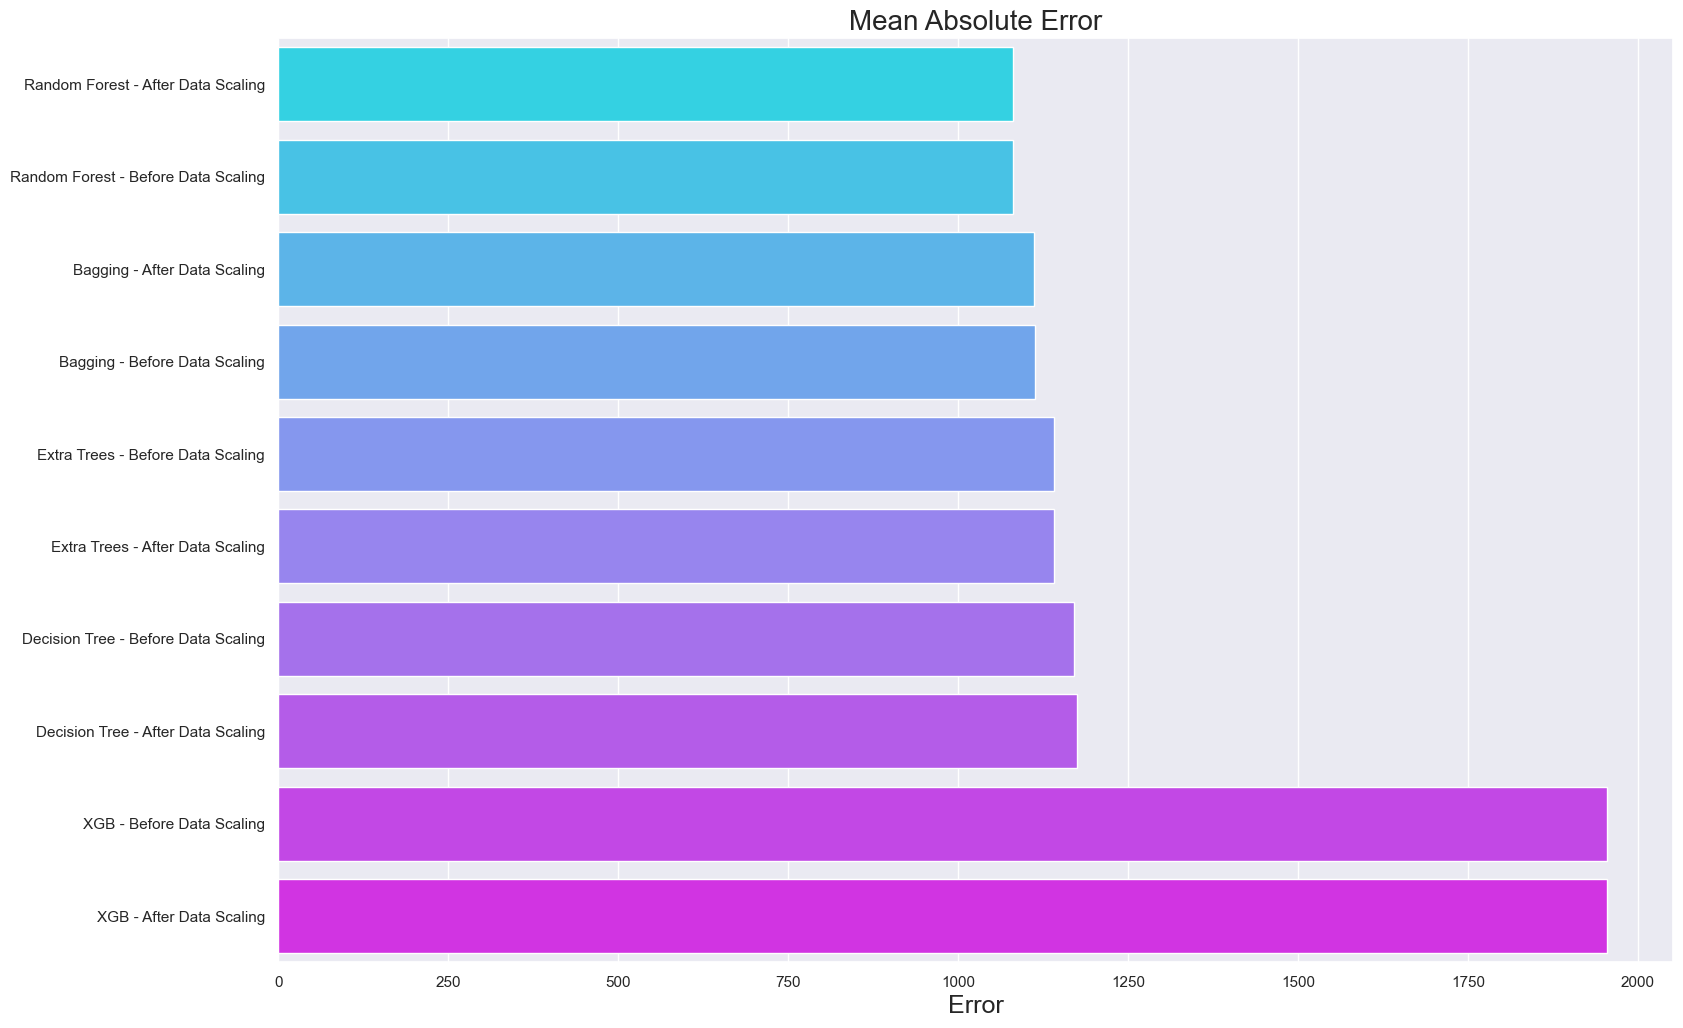

In [55]:
f, ax = plt.subplots(figsize=(18,12))
sns.barplot(data=compareByMae, x='mae', y='model_type', palette='cool')
plt.title('Mean Absolute Error')
plt.xlabel('Error')
plt.ylabel('')

##### **R2 Score**

Text(0, 0.5, '')

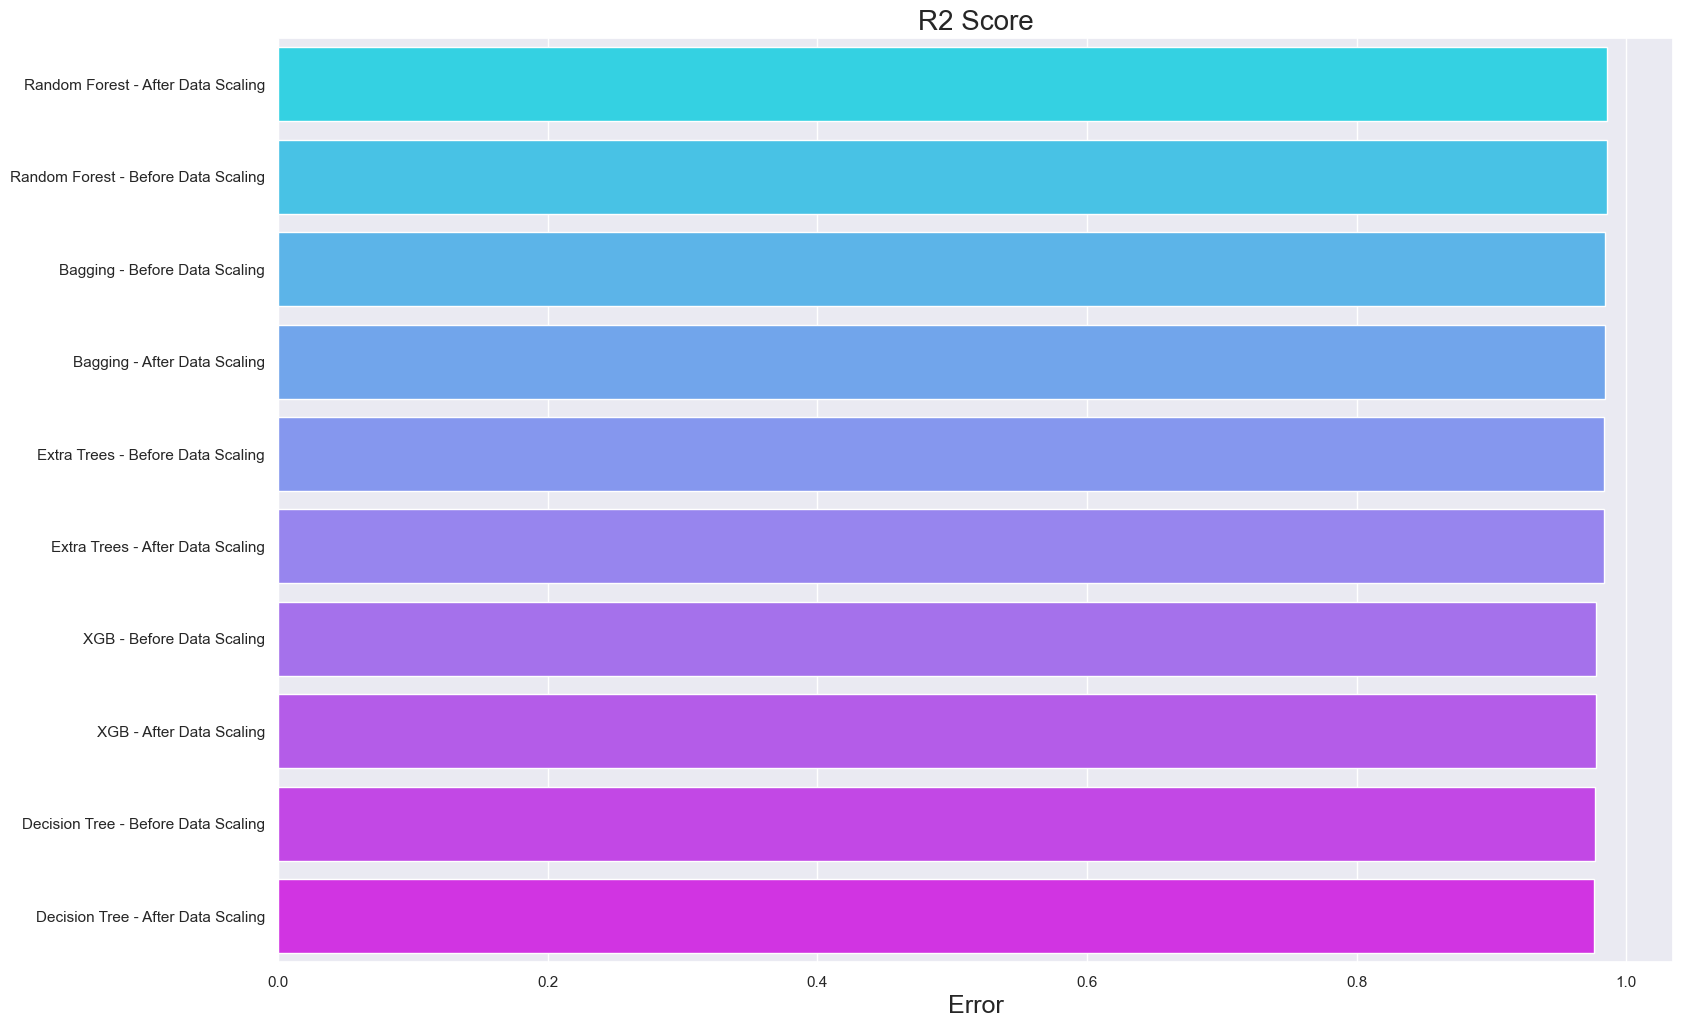

In [56]:
f, ax = plt.subplots(figsize=(18,12))
sns.barplot(data=compareByR2Score, x='r2_score', y='model_type', palette='cool')
plt.title('R2 Score')
plt.xlabel('Error')
plt.ylabel('')

#### **Conclusion --Best Model**
- Model terbaik berdasarkan Evaluation Metrics di atas adalah "Random Forest - After Data Scaling".

### **Hyperparameter Tuning**

In [57]:
# !pip install --upgrade scikit-learn
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, HalvingGridSearchCV, HalvingRandomSearchCV
from sklearn.model_selection import StratifiedShuffleSplit, ShuffleSplit
# from sklearn.model_selection import cross_val_score #ini cuma buat classification
from sklearn.model_selection import StratifiedKFold, KFold

In [61]:
nEstimators = [100, 600]
maxFeatures = [10, 30]
maxDepth = [10, 25]
minSamplesLeaf = [2, 4]

bestModelAlgorithm = {
  'randomForestRegression': {
    'model': RandomForestRegressor(),
    'params': {
      'n_estimators': nEstimators,
      'max_features': maxFeatures,
      'max_depth': maxDepth,
      'min_samples_leaf': minSamplesLeaf,
      'random_state': [randomState_],
      'n_jobs': [-1],
      'oob_score': [True]
      }}
}

In [59]:
def kFold(k=numOfFold): return KFold(n_splits=k, random_state=randomState_, shuffle=isShuffle)
def shuffleSplit(k=numOfFold): return ShuffleSplit(n_splits=k, test_size=testSize, random_state=randomState_)

def bestModelUsingGSCV(xTrain, yTrain, xTest, yTest, cv):
  scores = []
  for key, value in bestModelAlgorithm.items():
    gscv = GridSearchCV(
      estimator=value['model'],
      param_grid=value['params'], 
      cv=cv,
      scoring='neg_mean_absolute_error')
    gscv.fit(xTrain, yTrain)
    scores.append({
      'model': key,
      'gscv_best_score': gscv.best_score_,
      'gscv_best_params': gscv.best_params_
    })
  return pd.DataFrame(scores,columns=['model', 'gscv_best_score', 'gscv_best_params'])
  
def bestModelUsingHGSCV(xTrain, yTrain, xTest, yTest, cv):
  scores = []
  for key, value in bestModelAlgorithm.items():
    hgscv = HalvingGridSearchCV(
      estimator=value['model'],
      param_grid=value['params'], 
      cv=cv,
      scoring='neg_mean_absolute_error')
    hgscv.fit(xTrain, yTrain)
    scores.append({
      'model': key,
      'hgscv_best_score': hgscv.best_score_,
      'hgscv_best_params': hgscv.best_params_
    })
  return pd.DataFrame(scores,columns=['model', 'hgscv_best_score', 'hgscv_best_params'])

#### **K-Fold Cross Validation**

In [60]:
resultKFold = bestModelUsingGSCV(x_train, y_train, x_test, y_test, kFold(numOfFold))

NameError: name 'bestModelAlgorithm' is not defined

In [55]:
# print(resultKFold.gscv_best_params.to_list())
# resultKFold

#### **Shuffle Split Cross Validation**

In [56]:
# resultShuffleSplit = bestModelUsingGSCV(x_train, y_train, x_test, y_test, shuffleSplit(numOfFold))

In [57]:
# print(resultShuffleSplit.gscv_best_params.to_list())
# resultShuffleSplit

#### Comparing

In [58]:
# for key, value in resultKFold.gscv_best_params.to_list()[0].items():
#   print(f'{key}: {value}')
#   exec(f'{key} = value') #all key and value to variable

In [59]:
# modelRandomForestBeforeHyperTuning = ['Random Forest Beforee Hyperparameter', RandomForestRegressor()]
# modelRandomForestAfterHyperTuning = ['Random Forest After Hyperparameter', RandomForestRegressor(
#   max_depth=max_depth,
#   max_features=max_features,
#   min_samples_leaf=min_samples_leaf,
#   n_estimators=n_estimators,
#   n_jobs=n_jobs,
#   oob_score=oob_score,
#   random_state=random_state
# )]

In [60]:
# modelRandomForestBeforeHyperTuning_ = modelEvaluation(x_train,x_test,y_train,y_test,modelRandomForestBeforeHyperTuning)
# modelRandomForestAfterHyperTuning_ = modelEvaluation(x_train,x_test,y_train,y_test,modelRandomForestAfterHyperTuning)

In [61]:
# compareBeforeAfterHyperTuning = pd.concat([modelRandomForestBeforeHyperTuning_,modelRandomForestAfterHyperTuning_]).reset_index(drop=True)
# compareBeforeAfterHyperTuning

# **MODEL BUILDING**

In [63]:
#model
x = dfModelAfterScaling.drop(['price'], axis=1) #dfModelAfterScaling --> scaling & free outliers
y = dfModelAfterScaling.price
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=testSize, random_state=randomState_)

model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [64]:
modelRandomForest_ = modelEvaluation(x_train,x_test,y_train,y_test,modelRandomForest)
modelRandomForest_.reset_index(drop=True)

model          mae  r2_score
0  Random Forest  1078.965859  0.985692

## **Random Forest Tuning**

### **max_depth**

In [64]:
maxDepth_ = [15, 20, 25, 30]
trainAcc = []
testAcc = []
for value in maxDepth_: 
  rf = RandomForestRegressor(random_state = randomState_, max_depth = value)
  rf.fit(x_train, y_train)
  yPredTrain = rf.predict(x_train)
  yPredTest = rf.predict(x_test)
  trainScore = metrics.r2_score(y_train, yPredTrain)
  testScore = metrics.r2_score(y_test, yPredTest)
  trainAcc.append(trainScore)
  testAcc.append(testScore)
  print(f'max_features: {value} \t acc: {testScore}')

max_features: 15 	 acc: 0.9780880168891618
max_features: 20 	 acc: 0.9848043518775923
max_features: 25 	 acc: 0.9854814463363384
max_features: 30 	 acc: 0.9852516465859948


Text(0.5, 66.24999999999999, 'max_depth')

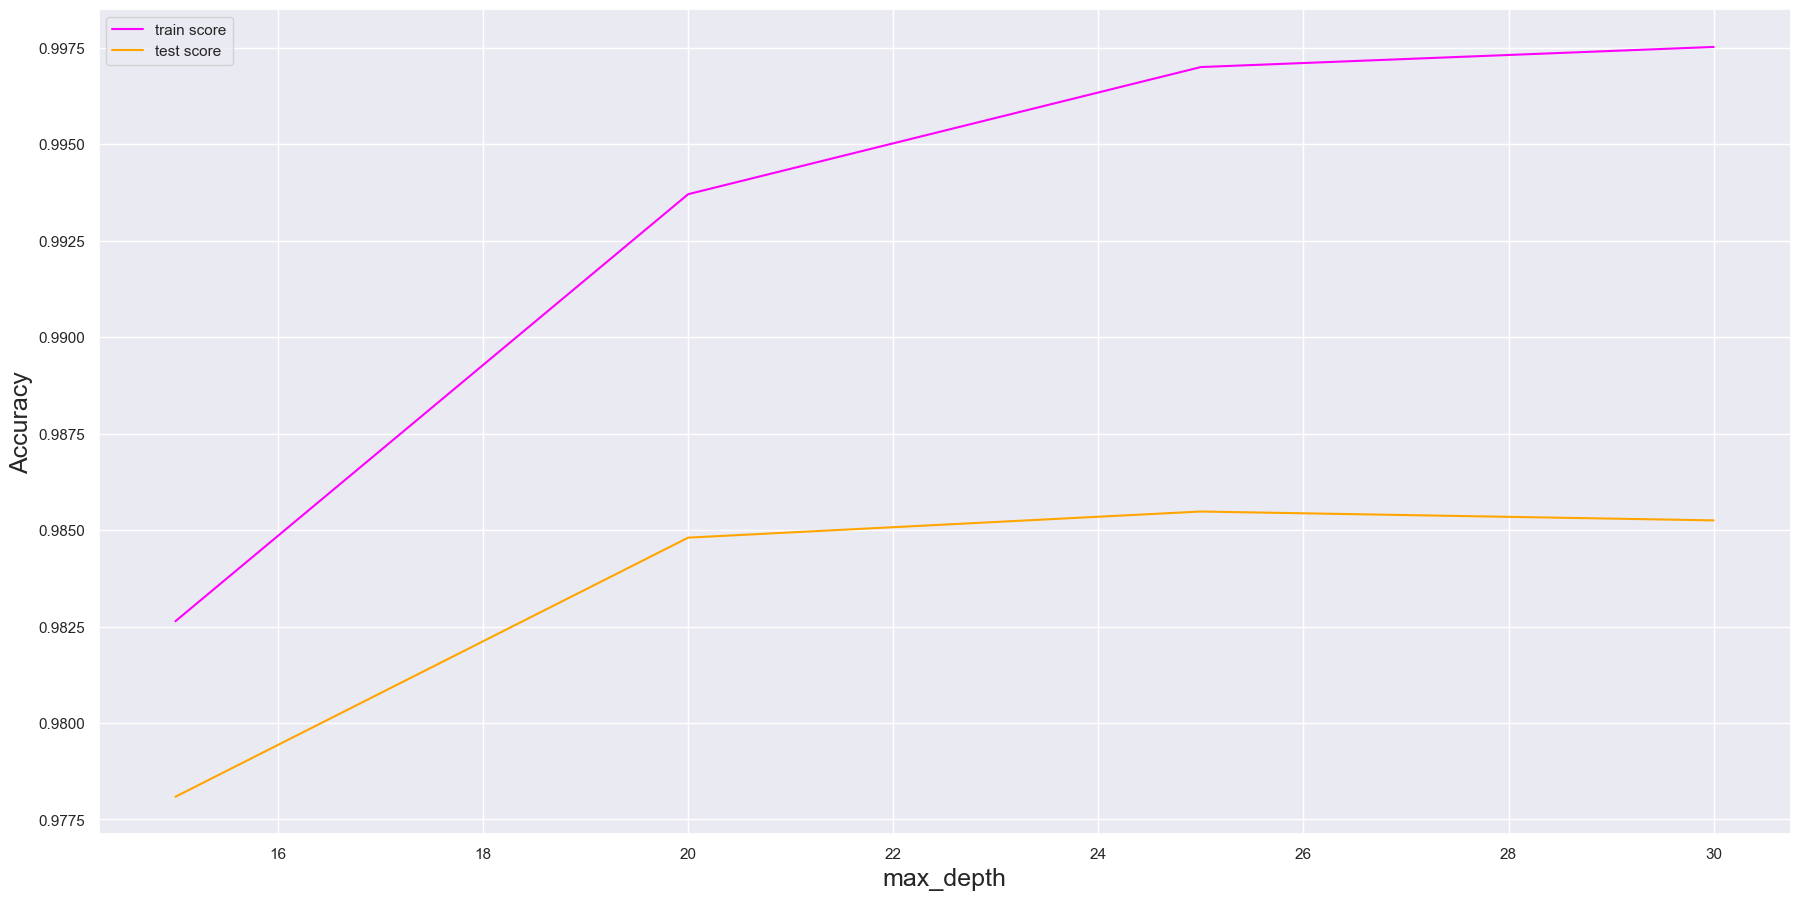

In [65]:
f, ax = plt.subplots(figsize=(18,9))
sns.lineplot(x=maxDepth_, y=trainAcc, color='magenta', label='train score')
sns.lineplot(x=maxDepth_, y=testAcc, color='orange', label='test score')
plt.tight_layout()
plt.ylabel('Accuracy')
plt.xlabel('max_depth')

### min_samples_leaf

In [66]:
minSamplesLeaf_ = [1,2,3,4]
trainAcc = []
testAcc = []
for value in minSamplesLeaf_: 
  rf = RandomForestRegressor(random_state = randomState_, max_depth = 25, min_samples_leaf=value)
  rf.fit(x_train, y_train)
  yPredTrain = rf.predict(x_train)
  yPredTest = rf.predict(x_test)
  trainScore = metrics.r2_score(y_train, yPredTrain)
  testScore = metrics.r2_score(y_test, yPredTest)
  trainAcc.append(trainScore)
  testAcc.append(testScore)
  print(f'max_features: {value} \t acc: {testScore}')

max_features: 1 	 acc: 0.9854814463363384
max_features: 2 	 acc: 0.9859482122842995
max_features: 3 	 acc: 0.9858976044983309
max_features: 4 	 acc: 0.9857617031023338


Text(0.5, 66.24999999999999, 'min_samples_leaf')

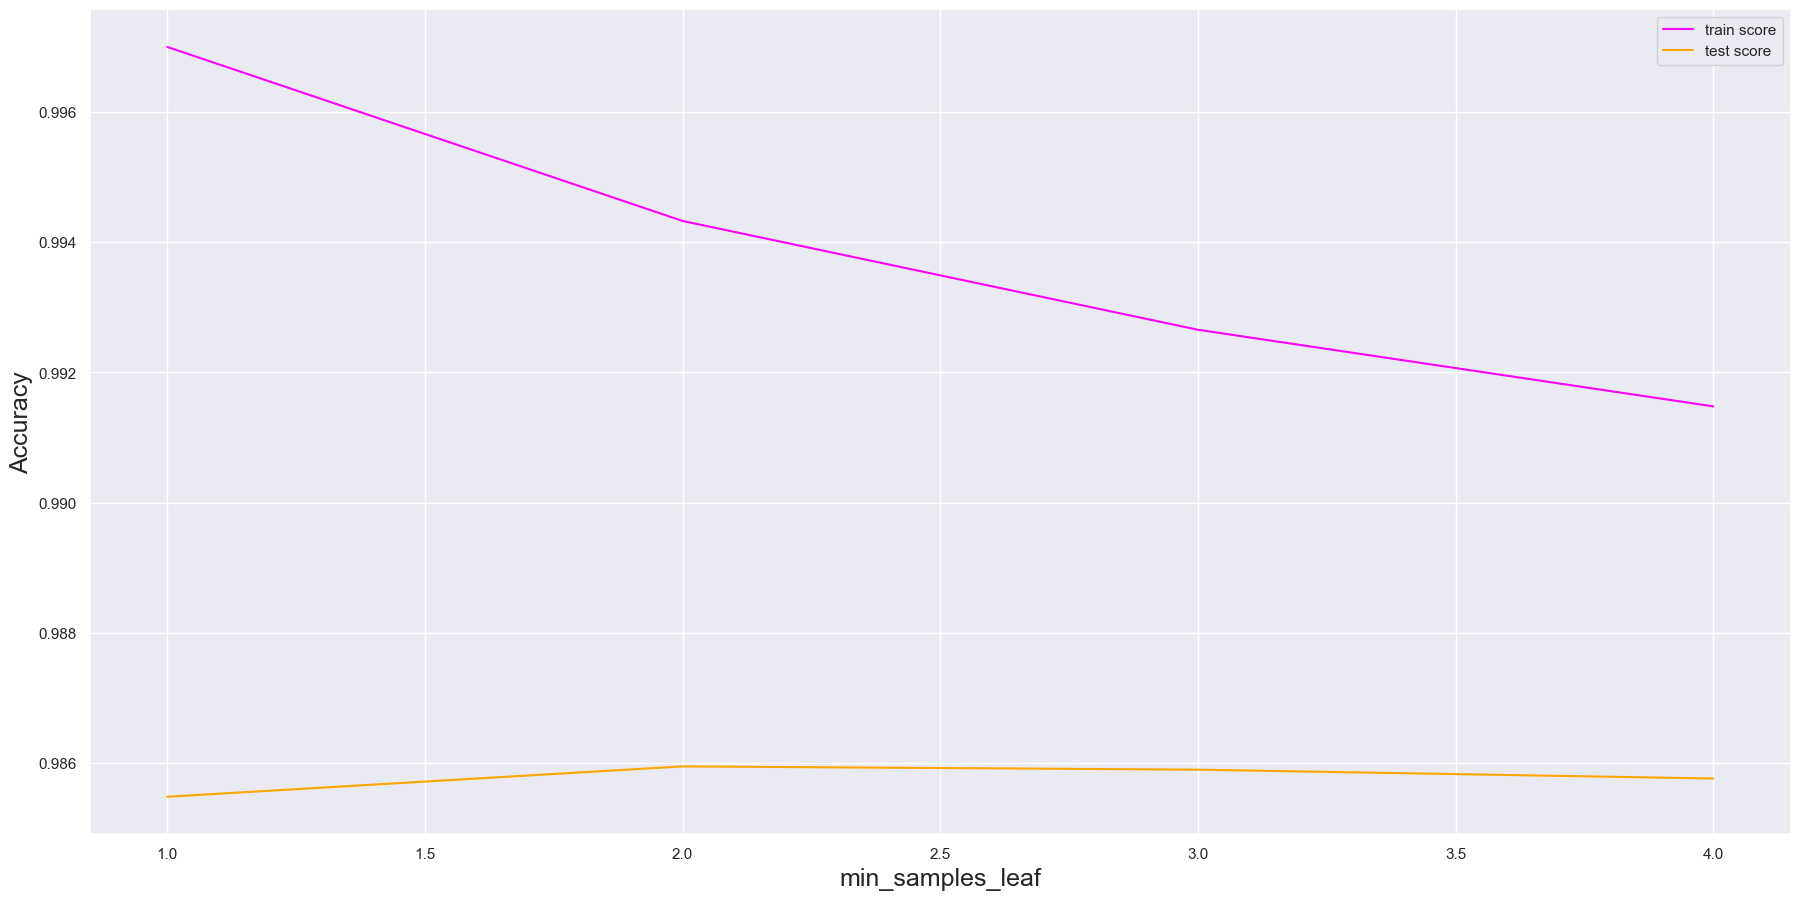

In [67]:
f, ax = plt.subplots(figsize=(18,9))
sns.lineplot(x=minSamplesLeaf_, y=trainAcc, color='magenta', label='train score')
sns.lineplot(x=minSamplesLeaf_, y=testAcc, color='orange', label='test score')
plt.tight_layout()
plt.ylabel('Accuracy')
plt.xlabel('min_samples_leaf')

### max_features

In [68]:
maxFeatures_ = [5,10,15,20,23,25,27,30]
trainAcc = []
testAcc = []
for value in maxFeatures_: 
  rf = RandomForestRegressor(random_state = randomState_, max_depth = 25, min_samples_leaf=2, max_features=value)
  rf.fit(x_train, y_train)
  yPredTrain = rf.predict(x_train)
  yPredTest = rf.predict(x_test)
  trainScore = metrics.r2_score(y_train, yPredTrain)
  testScore = metrics.r2_score(y_test, yPredTest)
  trainAcc.append(trainScore)
  testAcc.append(testScore)
  print(f'max_features: {value} \t acc: {testScore}')

max_features: 5 	 acc: 0.9842656728245279
max_features: 10 	 acc: 0.9853508417862988
max_features: 15 	 acc: 0.9857741111001809
max_features: 20 	 acc: 0.9859487903244195
max_features: 23 	 acc: 0.9859968243370052
max_features: 25 	 acc: 0.986027868350745
max_features: 27 	 acc: 0.9860372384389935
max_features: 30 	 acc: 0.9860738842394564


Text(0.5, 66.24999999999999, 'max_features')

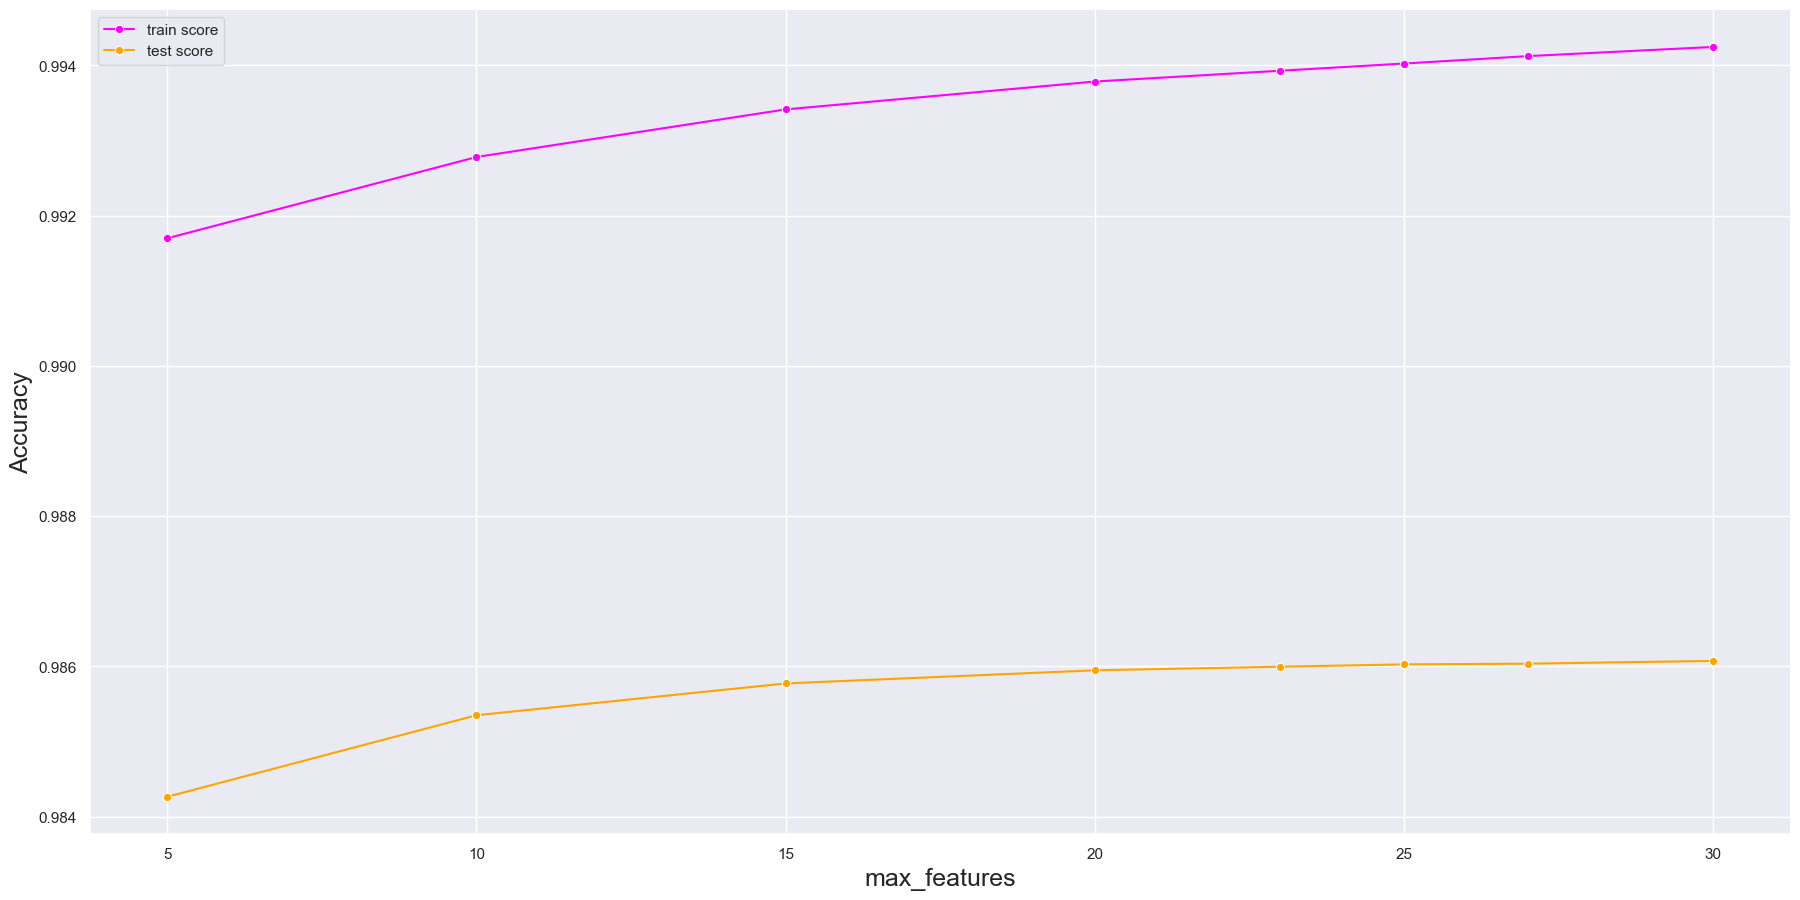

In [69]:
f, ax = plt.subplots(figsize=(18,9))
sns.lineplot(x=maxFeatures_, y=trainAcc, color='magenta', label='train score', marker='o')
sns.lineplot(x=maxFeatures_, y=testAcc, color='orange', label='test score', marker='o')
plt.tight_layout()
plt.ylabel('Accuracy')
plt.xlabel('max_features')

### **n_estimators**

In [70]:
nEstimators_ = [200,300,400,500,600]
trainAcc = []
testAcc = []
for value in nEstimators_: 
  rf = RandomForestRegressor(
    random_state=randomState_, max_depth=25, min_samples_leaf=2, 
    max_features=27, n_estimators=value)
  rf.fit(x_train, y_train)
  yPredTrain = rf.predict(x_train)
  yPredTest = rf.predict(x_test)
  trainScore = metrics.r2_score(y_train, yPredTrain)
  testScore = metrics.r2_score(y_test, yPredTest)
  trainAcc.append(trainScore)
  testAcc.append(testScore)
  print(f'n_estimators: {value} \t acc: {testScore}')

n_estimators: 200 	 acc: 0.9860922256807392
n_estimators: 300 	 acc: 0.9861132198178248
n_estimators: 400 	 acc: 0.986123046166866
n_estimators: 500 	 acc: 0.9861365537353856
n_estimators: 600 	 acc: 0.9861439102570528


Text(0.5, 66.24999999999999, 'n_estimators')

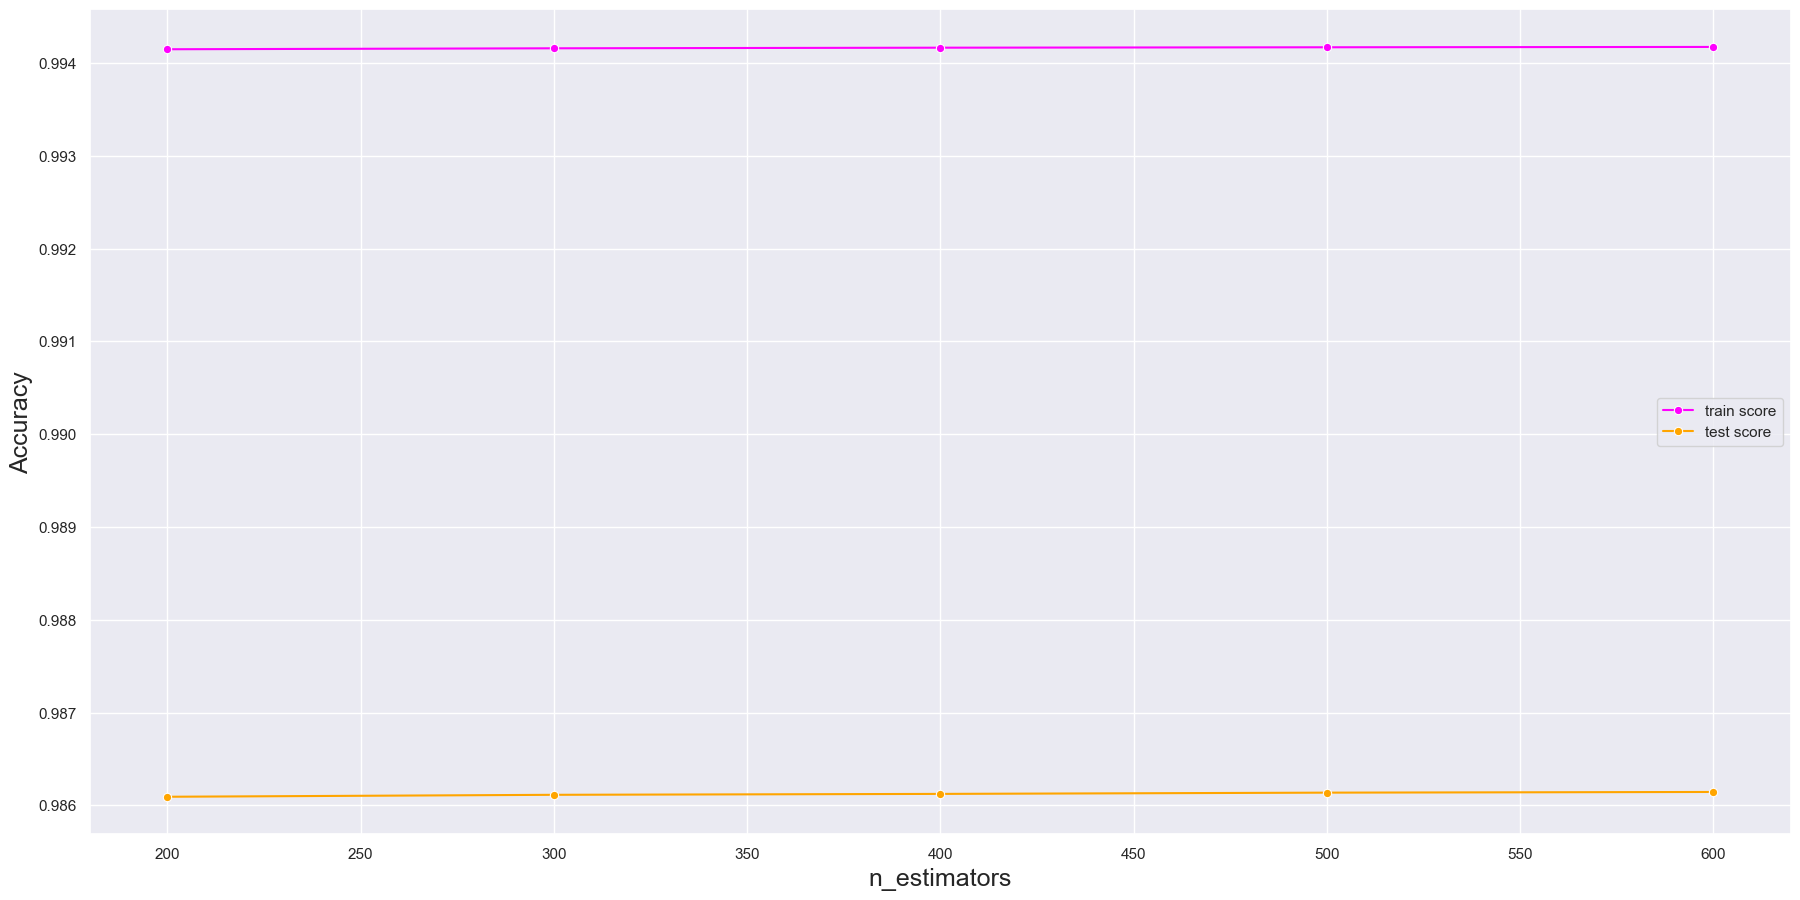

In [71]:
f, ax = plt.subplots(figsize=(18,9))
sns.lineplot(x=nEstimators_, y=trainAcc, color='magenta', label='train score', marker='o')
sns.lineplot(x=nEstimators_, y=testAcc, color='orange', label='test score', marker='o')
plt.tight_layout()
plt.ylabel('Accuracy')
plt.xlabel('n_estimators')

## **Comparing**

In [72]:
modelRFBeforeTuning = ['Random Forest Before Tuning', RandomForestRegressor()]
modelRFAfterTuning0 = [
  'Random Forest After Tuning (n=100)',
  RandomForestRegressor(
    random_state=randomState_, 
    max_depth=25, 
    min_samples_leaf=2, 
    max_features=27, 
    n_estimators=100, 
    n_jobs=-1,
    oob_score=True
  )
]
modelRFAfterTuning1 = [
  'Random Forest After Tuning (n=500)',
  RandomForestRegressor(
    random_state=randomState_, 
    max_depth=25, 
    min_samples_leaf=2, 
    max_features=27, 
    n_estimators=500, 
    n_jobs=-1,
    oob_score=True
  )
]

In [73]:
modelRFBeforeTuning_ = modelEvaluation(x_train, x_test, y_train, y_test, modelRFBeforeTuning)
modelRFAfterTuning0_ = modelEvaluation(x_train, x_test, y_train, y_test, modelRFAfterTuning0)
modelRFAfterTuning1_ = modelEvaluation(x_train, x_test, y_train, y_test, modelRFAfterTuning1)

In [74]:
pd.concat([modelRFBeforeTuning_, modelRFAfterTuning0_, modelRFAfterTuning1_]).reset_index(drop=True)

model          mae         rmse  r2_score
0         Random Forest Before Tuning  1100.039356  2754.986128  0.985215
1  Random Forest After Tuning (n=100)  1159.348528  2677.302647  0.986037
2  Random Forest After Tuning (n=500)  1154.191733  2667.764003  0.986137

## test all label encode

In [138]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

dfModelForLabel = data.copy()
labelColumns = []

dfModelForLabel.drop(['Unnamed: 0','flight'], axis=1, inplace=True)
for x in dfModelForLabel.columns:
  if dfModelForLabel[x].dtype == 'object':
    dfModelForLabel[x] = dfModelForLabel[x].astype('category')
    labelColumns.append(x)
  
#label
for x in labelColumns: 
  dfModelForLabel[x] = LabelEncoder().fit_transform(dfModelForLabel[x])

# standard = days_left
# normalize = duration
dfModelForLabelAfterScaling = dfModelForLabel.copy()

dfModelForLabelAfterScaling.days_left = StandardScaler().fit_transform(dfModelForLabelAfterScaling[['days_left']])
dfModelForLabelAfterScaling.duration = MinMaxScaler().fit_transform(dfModelForLabelAfterScaling[['duration']])

#remove outliers
dfModelForLabelScalingRemoveOutliers = dfModelForLabelAfterScaling.copy()
dfModelForLabelScalingRemoveOutliers = dfModelForLabelScalingRemoveOutliers[((dfModelForLabelScalingRemoveOutliers.price > priceOutliers['lowerWhisker']) & (dfModelForLabelScalingRemoveOutliers.price < priceOutliers['upperWhisker'])) &
                    ((dfModelForLabelScalingRemoveOutliers.duration > durationOutliers['lowerWhisker']) & (dfModelForLabelScalingRemoveOutliers.duration < durationOutliers['upperWhisker'])) &
                    ((dfModelForLabelScalingRemoveOutliers.days_left > daysLeftOurliers['lowerWhisker']) & (dfModelForLabelScalingRemoveOutliers.days_left < daysLeftOurliers['upperWhisker']))]

#train test split
xL = dfModelForLabelScalingRemoveOutliers.drop(['price'], axis=1) #dfModelForLabelScalingRemoveOutliers --> scaling & free outliers
yL = dfModelForLabelScalingRemoveOutliers.price
x_train_label, x_test_label, y_train_label, y_test_label=train_test_split(xL, yL, test_size=testSize, random_state=randomState_)

modelLabel = RandomForestRegressor().fit(x_train_label, y_train_label)

## **export dataset**

In [213]:
dfModelForLabelScalingRemoveOutliers.to_csv(index=False, path_or_buf='./db/clean-data-label-encoding.csv')
dfModelScalingRemoveOutliers.to_csv(index=False, path_or_buf='./db/clean-data.csv')

In [25]:
dfOnlyRemoveOutliers = data.copy()
dfOnlyRemoveOutliers.drop(['Unnamed: 0','flight'], axis=1, inplace=True)
for x in dfOnlyRemoveOutliers.columns:
  if dfOnlyRemoveOutliers[x].dtype == 'object':
    dfOnlyRemoveOutliers[x] = dfOnlyRemoveOutliers[x].astype('category')
dfOnlyRemoveOutliers = dfOnlyRemoveOutliers[((dfOnlyRemoveOutliers.price > priceOutliers['lowerWhisker']) & (dfOnlyRemoveOutliers.price < priceOutliers['upperWhisker'])) &
                    ((dfOnlyRemoveOutliers.duration > durationOutliers['lowerWhisker']) & (dfOnlyRemoveOutliers.duration < durationOutliers['upperWhisker'])) &
                    ((dfOnlyRemoveOutliers.days_left > daysLeftOurliers['lowerWhisker']) & (dfOnlyRemoveOutliers.days_left < daysLeftOurliers['upperWhisker']))]
dfOnlyRemoveOutliers.to_csv(index=False, path_or_buf='./db/clean-data-only-remove-outliers.csv')

In [139]:
modelLabelRandomForest_ = modelEvaluation(x_train_label,x_test_label,y_train_label,y_test_label,modelRandomForest)
modelLabelRandomForest_.reset_index(drop=True)

model         mae         rmse  r2_score
0  Random Forest  1110.53893  2764.383231  0.985114

In [77]:
# modelLabelRandomForestAfterHyperTuning_ = modelEvaluation(x_train_label,x_test_label,y_train_label,y_test_label,modelRandomForestAfterHyperTuning)

In [ ]:
# compareBeforeAfterHyperTuning_ = pd.concat([compareBeforeAfterHyperTuning, modelLabelRandomForestAfterHyperTuning_]).reset_index(drop=True)
# compareBeforeAfterHyperTuning_

# **OVERFIT TEST**

In [ ]:
# from yellowbrick.model_selection import LearningCurve

# visualizer = LearningCurve(model, scoring='r2')
# visualizer.fit(x_train, y_train)        # Fit the data to the visualizer
# visualizer.show()  

# FEATURE IMPORTANCE

In [71]:
importanceIndex = dfModelAfterScaling.columns.to_list()
importanceIndex.remove('price')

## MDI

In [72]:
importances = model.feature_importances_
importances

array([1.68712301e-03, 8.81911549e-01, 5.68865197e-02, 1.79610875e-02,
       4.79836493e-04, 5.31781309e-03, 1.19824445e-04, 3.52322095e-04,
       7.51325591e-05, 4.32788118e-03, 1.16810182e-03, 9.50552260e-04,
       3.51055080e-03, 1.30894494e-03, 1.78259111e-03, 2.15795969e-03,
       8.18444525e-04, 7.96339758e-04, 1.03012055e-03, 5.29415841e-05,
       8.50773835e-04, 7.47170448e-04, 9.74838243e-04, 5.86638832e-04,
       1.65949237e-03, 1.50731959e-04, 6.02259139e-04, 1.09338979e-03,
       1.34561075e-03, 9.35652734e-04, 3.04930083e-03, 1.57231628e-03,
       1.80226466e-03, 1.93392360e-03])

In [73]:
featureImportanceMDI = pd.DataFrame(list(zip(importanceIndex, importances)), columns=['feature_name', 'importance_value'])
featureImportanceMDI

feature_name  importance_value
0                          stops          0.001687
1                          class          0.881912
2                       duration          0.056887
3                      days_left          0.017961
4                airline_AirAsia          0.000480
5              airline_Air_India          0.005318
6               airline_GO_FIRST          0.000120
7                 airline_Indigo          0.000352
8               airline_SpiceJet          0.000075
9                airline_Vistara          0.004328
10         source_city_Bangalore          0.001168
11           source_city_Chennai          0.000951
12             source_city_Delhi          0.003511
13         source_city_Hyderabad          0.001309
14           source_city_Kolkata          0.001783
15            source_city_Mumbai          0.002158
16      departure_time_Afternoon          0.000818
17  departure_time_Early_Morning          0.000796
18        departure_time_Evening          0.001030
19     departure_time_Late_Night          0.000053
20        departure_time_Morning          0.000851
21          departure_time_Night          0.000747
22        arrival_time_Afternoon          0.000975
23    arrival_time_Early_Morning          0.000587
24          arrival_time_Evening          0.001659
25       arrival_time_Late_Night          0.000151
26          arrival_time_Morning          0.000602
27            arrival_time_Night          0.001093
28    destination_city_Bangalore          0.001346
29      destination_city_Chennai          0.000936
30        destination_city_Delhi          0.003049
31    destination_city_Hyderabad          0.001572
32      destination_city_Kolkata          0.001802
33       destination_city_Mumbai          0.001934

Text(0.5, 1.0, 'Feature Importance (MDI)')

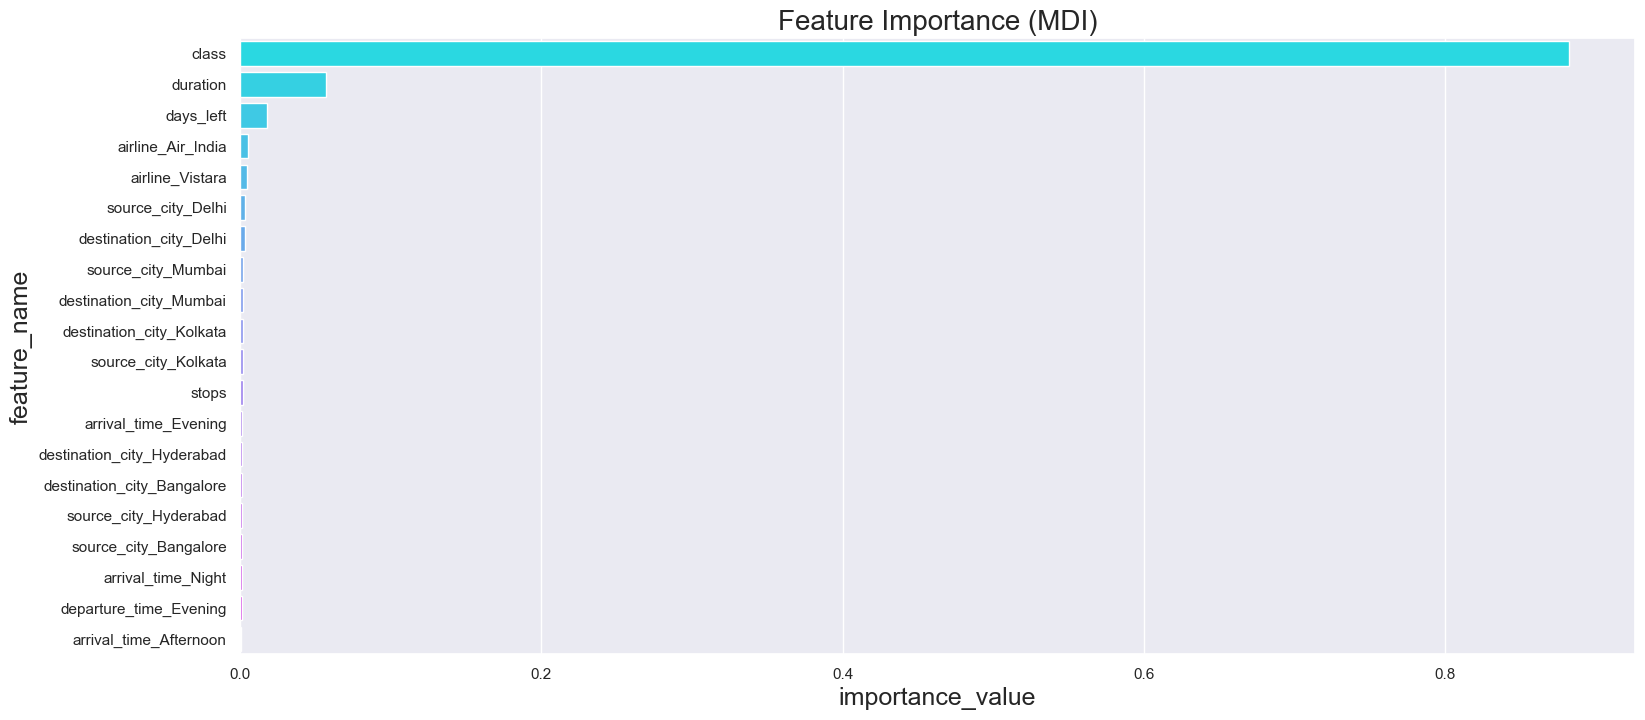

In [74]:
f, ax = plt.subplots()

sns.barplot(y='feature_name', 
            x='importance_value', 
            data=featureImportanceMDI.sort_values('importance_value', ascending=False).head(20), 
            palette='cool')

plt.title('Feature Importance (MDI)')

# **PICKLE**

In [67]:
import pickle

pickle.dump(model, open('./model/rf-model.pkl', 'wb'))
# pickle.dump(modelLabel, open('./model/rf-label-model.pkl', 'wb'))

In [141]:
dfModelScalingRemoveOutliers

stops  class  duration  days_left  price  airline_AirAsia  \
0           2      1  0.027347  -1.843875   5953                0   
1           2      1  0.030612  -1.843875   5953                0   
2           2      1  0.027347  -1.843875   5956                1   
3           2      1  0.028980  -1.843875   5955                0   
4           2      1  0.030612  -1.843875   5955                0   
...       ...    ...       ...        ...    ...              ...   
300148      0      0  0.188776   1.695692  69265                0   
300149      0      0  0.195714   1.695692  77105                0   
300150      0      0  0.265306   1.695692  79099                0   
300151      0      0  0.187143   1.695692  81585                0   
300152      0      0  0.188776   1.695692  81585                0   

        airline_Air_India  airline_GO_FIRST  airline_Indigo  airline_SpiceJet  \
0                       0                 0               0                 1   
1                       0                 0               0                 1   
2                       0                 0               0                 0   
3                       0                 0               0                 0   
4                       0                 0               0                 0   
...                   ...               ...             ...               ...   
300148                  0                 0               0                 0   
300149                  0                 0               0                 0   
300150                  0                 0               0                 0   
300151                  0                 0               0                 0   
300152                  0                 0               0                 0   

        ...  arrival_time_Evening  arrival_time_Late_Night  \
0       ...                     0                        0   
1       ...                     0                        0   
2       ...                     0                        0   
3       ...                     0                        0   
4       ...                     0                        0   
...     ...                   ...                      ...   
300148  ...                     1                        0   
300149  ...                     0                        0   
300150  ...                     0                        0   
300151  ...                     1                        0   
300152  ...                     1                        0   

        arrival_time_Morning  arrival_time_Night  destination_city_Bangalore  \
0                          0                   1                           0   
1                          1                   0                           0   
2                          0                   0                           0   
3                          0                   0                           0   
4                          1                   0                           0   
...                      ...                 ...                         ...   
300148                     0                   0                           0   
300149                     0                   1                           0   
300150                     0                   1                           0   
300151                     0                   0                           0   
300152                     0                   0                           0   

        destination_city_Chennai  destination_city_Delhi  \
0                              0                       0   
1                              0                       0   
2                              0                       0   
3                              0                       0   
4                              0                       0   
...                          ...                     ...   
300148                         0                       0   
300149              

In [143]:
data.head(5)

Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  
0          Night           Mumbai  Economy      2.17          1   5953  
1        Morning           Mumbai  Economy      2.33          1   5953  
2  Early_Morning           Mumbai  Economy      2.17          1   5956  
3      Afternoon           Mumbai  Economy      2.25          1   5955  
4        Morning           Mumbai  Economy      2.33          1   5955

In [147]:
dur = 2.17
minmax = (dur-data.duration.min())/(data.duration.max()-data.duration.min())
minmax

0.027346938775510202

In [148]:
dl = 1
stdscl = (dl-data.days_left.mean())/data.days_left.std()
stdscl

-1.843871699125883

In [153]:
dfModelForLabelAfterScaling['class'].value_counts()

1    206666
0     93487
Name: class, dtype: int64

In [154]:
data['class'].value_counts()

Economy     206666
Business     93487
Name: class, dtype: int64

In [158]:
data.source_city.value_counts()

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

In [157]:
dfModelForLabelAfterScaling.source_city.value_counts()

2    61343
5    60896
0    52061
4    46347
3    40806
1    38700
Name: source_city, dtype: int64

In [166]:
qwe = pd.read_csv('./db/clean-data-label-encoding.csv')
dur = qwe.duration
dur

0         0.027347
1         0.030612
2         0.027347
3         0.028980
4         0.030612
            ...   
300025    0.188776
300026    0.195714
300027    0.265306
300028    0.187143
300029    0.188776
Name: duration, Length: 300030, dtype: float64

In [26]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd
import numpy as np
dfq = pd.read_csv('./db/clean-data-only-remove-outliers.csv')
# oheColumns = ['airline', 'source_city', 'destination_city', 'departure_time', 'arrival_time']
# leStops = LabelEncoder()
# leClass = LabelEncoder()
# # oheAirline = OneHotEncoder(handle_unknown='ignore', sparse=False)
# # oheSourceCity = OneHotEncoder(handle_unknown='ignore', sparse=False)
# # oheDestinationCity = OneHotEncoder(handle_unknown='ignore', sparse=False)
# # oheDepartureTime = OneHotEncoder(handle_unknown='ignore', sparse=False)
# # oheArrivalTime = OneHotEncoder(handle_unknown='ignore', sparse=False)
# ohe = OneHotEncoder()

# # df.stops = leStops.fit_transform(df.stops)
# # df['class'] = leClass.fit_transform(df['class'])
# ohe.fit_transform(dfq[oheColumns])
dfq


airline source_city departure_time stops   arrival_time  \
0       SpiceJet       Delhi        Evening  zero          Night   
1       SpiceJet       Delhi  Early_Morning  zero        Morning   
2        AirAsia       Delhi  Early_Morning  zero  Early_Morning   
3        Vistara       Delhi        Morning  zero      Afternoon   
4        Vistara       Delhi        Morning  zero        Morning   
...          ...         ...            ...   ...            ...   
297915   Vistara     Chennai        Morning   one        Evening   
297916   Vistara     Chennai      Afternoon   one          Night   
297917   Vistara     Chennai  Early_Morning   one          Night   
297918   Vistara     Chennai  Early_Morning   one        Evening   
297919   Vistara     Chennai        Morning   one        Evening   

       destination_city     class  duration  days_left  price  
0                Mumbai   Economy      2.17          1   5953  
1                Mumbai   Economy      2.33          1   5953  
2                Mumbai   Economy      2.17          1   5956  
3                Mumbai   Economy      2.25          1   5955  
4                Mumbai   Economy      2.33          1   5955  
...                 ...       ...       ...        ...    ...  
297915        Hyderabad  Business     10.08         49  69265  
297916        Hyderabad  Business     10.42         49  77105  
297917        Hyderabad  Business     13.83         49  79099  
297918        Hyderabad  Business     10.00         49  81585  
297919        Hyderabad  Business     10.08         49  81585  

[297920 rows x 10 columns]